# Description of the final project.
## Alexey Nepochatov. HSE 2022.

![HSE_logo](https://www.hse.ru/mirror/pubs/share/522682412)

## Introduction

In this project, you are going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than \$50k/year) or "50000+" (means more than \$50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts. You should use train part to train the models, and test part to estimate their final quality. The best quality on the test dataset should be your final result.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description

The solution should have the following parts:

### [25%] 1. Data exploration

* 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?
* 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step
* 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### [25%] 2. Data preprocessing

* 2.1. (8%) Fill missing values (if there are any)
* 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding
* 2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

### [25%] 3. Model training

* 3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)
* 3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
* 3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

### [25%] 4. Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero

### ========================================================================================

## 1. Data exploration.
First, we import everything that is required during solving the task

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, RFE, f_classif
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, matthews_corrcoef, precision_score, recall_score, f1_score, get_scorer_names
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import shap
from lime.lime_tabular import LimeTabularExplainer

from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt

Upload data for exploration

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

AAGE            ACLSWKR  ADTIND  ADTOCC  \
0    64    Not in universe       0       0   
1    16    Not in universe       0       0   
2    45            Private      39      19   
3    34    Not in universe       0       0   
4    50   Local government      43      10   

                                      AHGA  AHRSPAY            AHSCOL  \
0                        7th and 8th grade        0   Not in universe   
1                                9th grade        0       High school   
2                               10th grade        0   Not in universe   
3                     High school graduate        0   Not in universe   
4   Masters degree(MA MS MEng MEd MSW MBA)        0   Not in universe   

                            AMARITL                                AMJIND  \
0   Married-civilian spouse present           Not in universe or children   
1                     Never married           Not in universe or children   
2   Married-civilian spouse present   Personal services except private HH   
3                          Divorced           Not in universe or children   
4                     Never married                             Education   

                    AMJOCC  ...                 PARENT        PEFNTVTY  \
0          Not in universe  ...        Not in universe            Cuba   
1          Not in universe  ...   Both parents present   United-States   
2                    Sales  ...        Not in universe   United-States   
3          Not in universe  ...        Not in universe   United-States   
4   Professional specialty  ...        Not in universe   United-States   

         PEMNTVTY        PENATVTY  \
0            Cuba            Cuba   
1   United-States   United-States   
2   United-States   United-States   
3   United-States   United-States   
4   United-States   United-States   

                                       PRCITSHP SEOTR            VETQVA  \
0   Foreign born- U S citizen by naturalization     0   Not in universe   
1             Native- Born in the United States     0   Not in universe   
2             Native- Born in the United States     0   Not in universe   
3             Native- Born in the United States     0   Not in universe   
4             Native- Born in the United States     0   Not in universe   

   VETYN  WKSWORK     target  
0      2        0   - 50000.  
1      2        0   - 50000.  
2      2       44   - 50000.  
3      2       24   - 50000.  
4      2       52    50000+.  

[5 rows x 40 columns]

In [4]:
test.head()

AAGE            ACLSWKR  ADTIND  ADTOCC                         AHGA  \
0    14    Not in universe       0       0                     Children   
1    42    Not in universe       0       0   Some college but no degree   
2    49            Private       9      35         High school graduate   
3    19   Local government      40      28         High school graduate   
4    57            Private      33      24         High school graduate   

   AHRSPAY            AHSCOL                           AMARITL  \
0        0   Not in universe                     Never married   
1        0   Not in universe   Married-civilian spouse present   
2        0   Not in universe   Married-civilian spouse present   
3        0   Not in universe                     Never married   
4        0   Not in universe   Married-civilian spouse present   

                         AMJIND                                AMJOCC  ...  \
0   Not in universe or children                       Not in universe  ...   
1   Not in universe or children                       Not in universe  ...   
2   Manufacturing-durable goods   Precision production craft & repair  ...   
3                 Entertainment                   Protective services  ...   
4                  Retail trade        Adm support including clerical  ...   

                  PARENT        PEFNTVTY        PEMNTVTY        PENATVTY  \
0   Both parents present   United-States   United-States   United-States   
1        Not in universe   United-States   United-States   United-States   
2        Not in universe   United-States   United-States   United-States   
3        Not in universe   United-States   United-States   United-States   
4        Not in universe   United-States   United-States   United-States   

                             PRCITSHP SEOTR            VETQVA  VETYN  WKSWORK  \
0   Native- Born in the United States     0   Not in universe      0        0   
1   Native- Born in the United States     2   Not in universe      2       13   
2   Native- Born in the United States     0   Not in universe      2       52   
3   Native- Born in the United States     0   Not in universe      2       34   
4   Native- Born in the United States     0   Not in universe      2       52   

      target  
0   - 50000.  
1   - 50000.  
2   - 50000.  
3   - 50000.  
4   - 50000.  

[5 rows x 40 columns]

Let's see how many records and features we have in the dataset:

In [5]:
train.shape, test.shape

((199523, 40), (99762, 40))

According to the task our goal is **to predict level of income** of a person. Let's investigate how the **income** feature is distributed. This feature is encoded as a binary feature, through the **target** feature, if the income is more than 50,000$ per year, then the target is **-50000**, if it is less, then the target is **50000+**.

In [6]:
train.target.value_counts()

 - 50000.    187141
 50000+.      12382
Name: target, dtype: int64

In [7]:
print(f'Percentage of people with income over 50,000 is {((train.target.value_counts()[1]/len(train))*100).round(1)}')

Percentage of people with income over 50,000 is 6.2


In [8]:
print(f'Percentage of people with income less than 50,000 is {((train.target.value_counts()[0]/len(train))*100).round(1)}')

Percentage of people with income less than 50,000 is 93.8


Let's compare ratios

In [9]:
((train.target.value_counts()[0]/len(train)) / (train.target.value_counts()[1]/len(train))).round(1)

15.1

### 1.1. Which metric are you going to use to evaluate the performance of the model and why?

**Answer:** We see that there are more than 15 times more people with an income of less than 50,000, we can consider that **we have unbalanced data**. Based on this, we can conclude that it is more reasonable to use the **F1 score** and **balanced accuracy**.

The **F1** score is very useful when we are dealing with imbalanced classes problems. These are problems when one class can dominate the dataset. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. 
F1 is a great scoring metric for imbalanced data when more attention is needed on the positives.

Major difference is that the F1-score does not care at all about how many negative examples we classified or how many negative examples are in the dataset at all; instead, the **balanced accuracy** metric gives half its weight to how many positives you labeled correctly and how many negatives you labeled correctly.

Let's make a function **compute_metrics** (like it was on on week 4 "Handling imbalanced data") that will calculate the specified metrics, we will also add precision, accuracy, Matthews correlation and recall to it, but they will be just for reference.

In [10]:
def compute_metrics(y_test, y_pred):
    print('1. Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('2. F-score: {:.4f}'.format(f1_score(y_test, y_pred)))
    print('3. Precision: {:.4f}'.format(precision_score(y_test, y_pred)))
    print('4. Recall: {:.4f}'.format(recall_score(y_test, y_pred)))
    print('5. Accuracy (balanced): {:.4f}'.format(balanced_accuracy_score(y_test, y_pred)))
    print('6. MCC: {:.4f}'.format(matthews_corrcoef(y_test, y_pred)))

### 1.2. Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step

**Answer:** I will use **Straitified K-fold**. We have an unbalanced dataset, so I want the proportions of those who earn more than 50,000\\$ and less than 50,000\$ to be the same in the training and test datasets. This Straitified K-fold cross-validation is a variation of KFold (**KFold** is a cross-validator that divides the dataset into k folds) that returns stratified folds (**Stratified** is to ensure that each fold of dataset has the same proportion of observations with a given label). The folds are made by preserving the percentage of samples for each class.

### 1.3. Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions


First, Let's look what features are in our dataset, what type they have.

In [11]:
train.dtypes

AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AHRSPAY      int64
AHSCOL      object
AMARITL     object
AMJIND      object
AMJOCC      object
ARACE       object
AREORGN     object
ASEX        object
AUNMEM      object
AUNTYPE     object
AWKSTAT     object
CAPGAIN      int64
CAPLOSS      int64
DIVVAL       int64
FILESTAT    object
GRINREG     object
GRINST      object
HHDFMX      object
HHDREL      object
MIGMTR1     object
MIGMTR3     object
MIGMTR4     object
MIGSAME     object
MIGSUN      object
NOEMP        int64
PARENT      object
PEFNTVTY    object
PEMNTVTY    object
PENATVTY    object
PRCITSHP    object
SEOTR        int64
VETQVA      object
VETYN        int64
WKSWORK      int64
target      object
dtype: object

Features names are encrypted, it is very difficult to understand what they mean, so let's use the data from the link ( https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29 ) in the task description and rename the features to make them more understandable to human.

Attribute Information:

More information detailing the meaning of the attributes can be found in the Census Bureau's documentation To make use of the data descriptions at this site, the following mappings to the Census Bureau's internal database column names will be needed:

- age AAGE
- class of worker ACLSWKR
- industry code ADTIND
- occupation code ADTOCC
- adjusted gross income AGI
- education AHGA
- wage per hour AHRSPAY
- enrolled in edu inst last wk AHSCOL
- marital status AMARITL
- major industry code AMJIND
- major occupation code AMJOCC
- mace ARACE
- hispanic Origin AREORGN
- sex ASEX
- member of a labor union AUNMEM
- reason for unemployment AUNTYPE
- full or part time employment stat AWKSTAT
- capital gains CAPGAIN
- capital losses CAPLOSS
- divdends from stocks DIVVAL
- federal income tax liability FEDTAX
- tax filer status FILESTAT
- region of previous residence GRINREG
- state of previous residence GRINST
- detailed household and family stat HHDFMX
- detailed household summary in household HHDREL
- instance weight MARSUPWT
- migration code-change in msa MIGMTR1
- migration code-change in reg MIGMTR3
- migration code-move within reg MIGMTR4
- live in this house 1 year ago MIGSAME
- migration prev res in sunbelt MIGSUN
- num persons worked for employer NOEMP
- family members under 18 PARENT
- total person earnings PEARNVAL
- country of birth father PEFNTVTY
- country of birth mother PEMNTVTY
- country of birth self PENATVTY
- citizenship PRCITSHP
- total person income PTOTVAL
- own business or self employed SEOTR
- taxable income amount TAXINC
- fill inc questionnaire for veteran's admin VETQVA
- veterans benefits VETYN
- weeks worked in year WKSWORK

In [12]:
columns_rename = {'AAGE': 'age', 
                  'ACLSWKR': 'class_of_worker',
                  'ADTIND': 'industry_code',
                  'ADTOCC': 'occupation_code',
                  'AGI': 'adjusted_gross_income',
                  'AHGA': 'education',
                  'AHRSPAY': 'wage_per_hour',
                  'AHSCOL': 'enrolled_in_edu_inst_last_wk',
                  'AMARITL': 'marital_status',
                  'AMJIND': 'major_industry_code',
                  'AMJOCC': 'major_occupation_code',
                  'ARACE': 'mace',
                  'AREORGN': 'hispanic_Origin',
                  'ASEX': 'sex',
                  'AUNMEM': 'member_of_a_labor_union',
                  'AUNTYPE': 'reason_for_unemployment',
                  'AWKSTAT': 'full_or_part_time_employment_stat',
                  'CAPGAIN': 'capital_gains',
                  'CAPLOSS': 'capital_losses',
                  'DIVVAL': 'divdends_from_stocks',
                  'FEDTAX': 'federal_income_tax_liability',
                  'FILESTAT': 'tax_filer_status',
                  'GRINREG': 'region_of_previous_residence',
                  'GRINST': 'state_of_previous_residence',
                  'HHDFMX': 'detailed_household_and_family_stat',
                  'HHDREL': 'detailed_household_summary_in_household',
                  'MARSUPWT': 'instance_weight',
                  'MIGMTR1': 'migration_code_change_in_msa',
                  'MIGMTR3': 'migration_code_change_in_reg',
                  'MIGMTR4': 'migration_code_move_within_reg',
                  'MIGSAME': 'live_in_this_house_1_year_ago',
                  'MIGSUN': 'migration_prev_res_in_sunbelt',
                  'NOEMP': 'num_persons_worked_for_employer',
                  'PARENT': 'family_members_under_18',
                  'PEARNVAL': 'total_person_earnings',
                  'PEFNTVTY': 'country_of_birth_father',
                  'PEMNTVTY': 'country_of_birth_mother',
                  'PENATVTY': 'country_of_birth_self',
                  'PRCITSHP': 'citizenship',
                  'PTOTVAL': 'total_person_income',
                  'SEOTR': 'own_business_or_self_employed',
                  'TAXINC': 'taxable_income_amount',
                  'VETQVA': 'fill_inc_questionnaire_for_veteran_admin',
                  'VETYN': 'veterans_benefits',
                  'WKSWORK': 'weeks_worked_in_year'}

In [13]:
train.rename(columns=columns_rename, inplace=True)
test.rename(columns=columns_rename, inplace=True)

In [14]:
train.head(1)

age   class_of_worker  industry_code  occupation_code           education  \
0   64   Not in universe              0                0   7th and 8th grade   

   wage_per_hour enrolled_in_edu_inst_last_wk  \
0              0              Not in universe   

                     marital_status           major_industry_code  \
0   Married-civilian spouse present   Not in universe or children   

  major_occupation_code  ... family_members_under_18 country_of_birth_father  \
0       Not in universe  ...         Not in universe                    Cuba   

  country_of_birth_mother country_of_birth_self  \
0                    Cuba                  Cuba   

                                    citizenship own_business_or_self_employed  \
0   Foreign born- U S citizen by naturalization                             0   

   fill_inc_questionnaire_for_veteran_admin  veterans_benefits  \
0                           Not in universe                  2   

   weeks_worked_in_year     target  
0                     0   - 50000.  

[1 rows x 40 columns]

Now much better, let's see what features we can consider as categorical.

Features of the type **object** we can consider as **categorical**.

In [15]:
train.select_dtypes(include=['object']).dtypes.drop('target')

class_of_worker                             object
education                                   object
enrolled_in_edu_inst_last_wk                object
marital_status                              object
major_industry_code                         object
major_occupation_code                       object
mace                                        object
hispanic_Origin                             object
sex                                         object
member_of_a_labor_union                     object
reason_for_unemployment                     object
full_or_part_time_employment_stat           object
tax_filer_status                            object
region_of_previous_residence                object
state_of_previous_residence                 object
detailed_household_and_family_stat          object
detailed_household_summary_in_household     object
migration_code_change_in_msa                object
migration_code_change_in_reg                object
migration_code_move_within_reg 

Now let's look at what features can be considered as **numerical**.

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train.select_dtypes(include=numerics).dtypes

age                                int64
industry_code                      int64
occupation_code                    int64
wage_per_hour                      int64
capital_gains                      int64
capital_losses                     int64
divdends_from_stocks               int64
num_persons_worked_for_employer    int64
own_business_or_self_employed      int64
veterans_benefits                  int64
weeks_worked_in_year               int64
dtype: object

Now let's see what distribution our features have

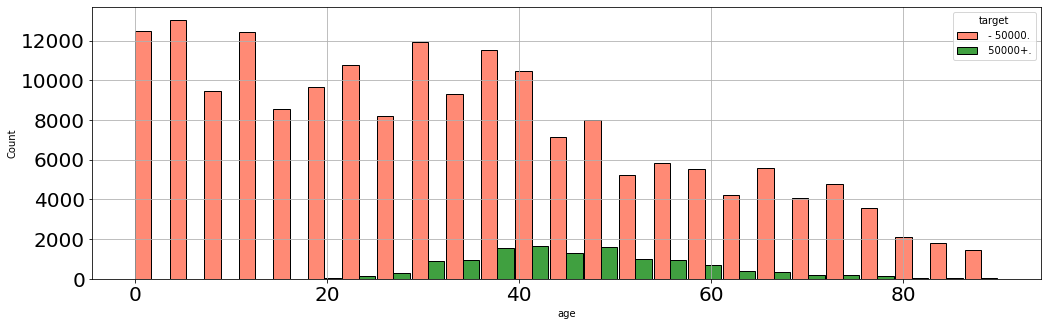

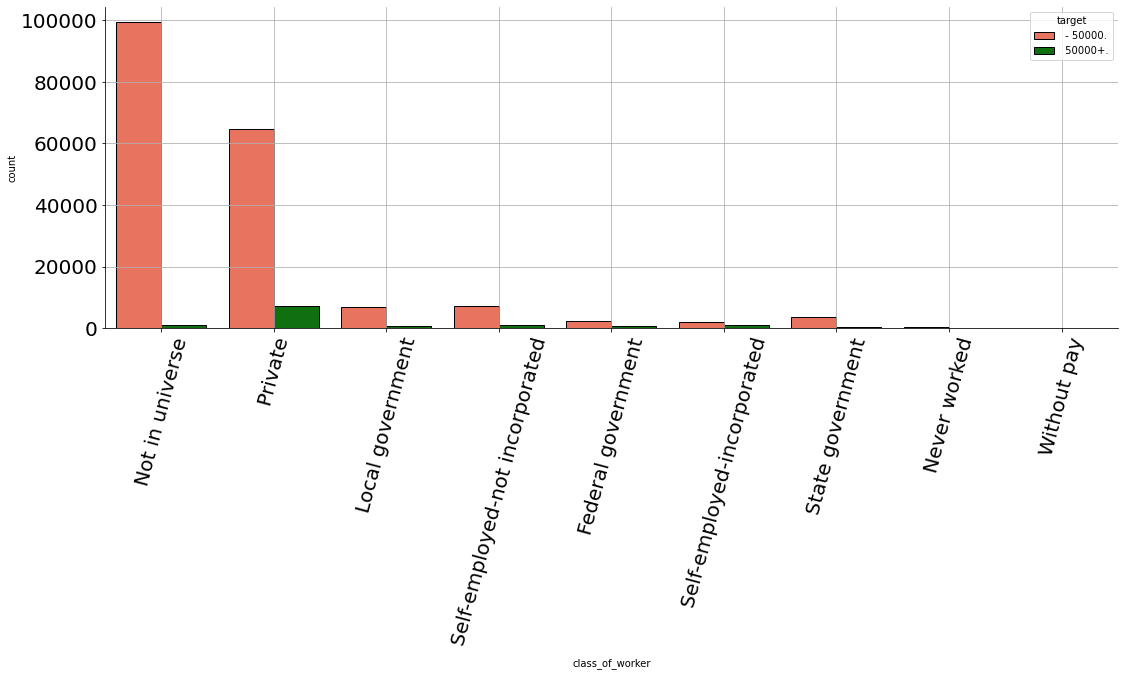

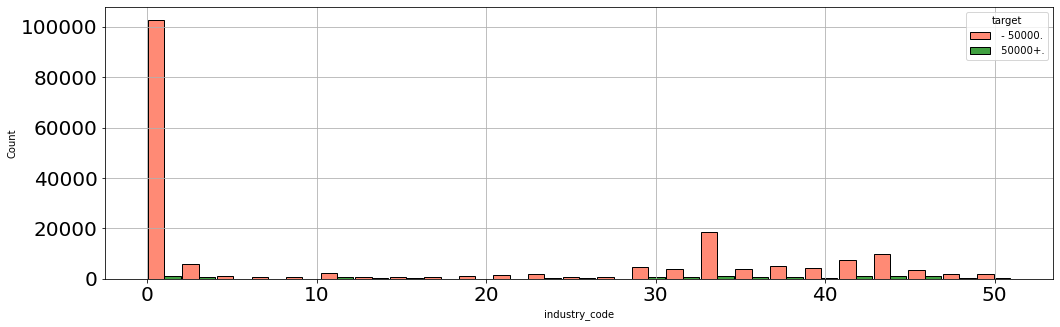

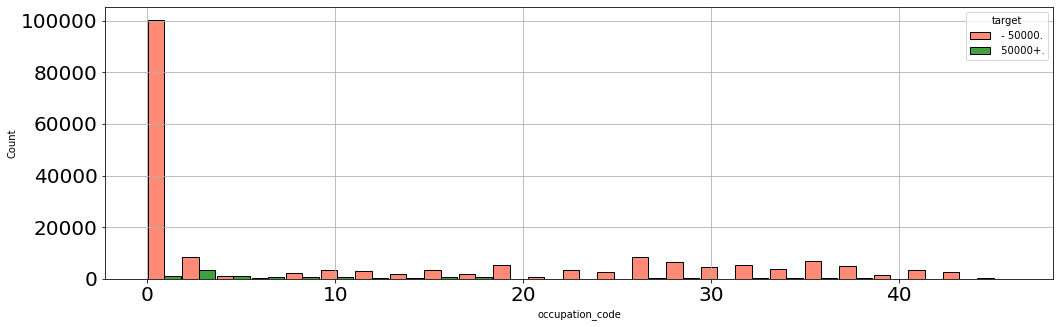

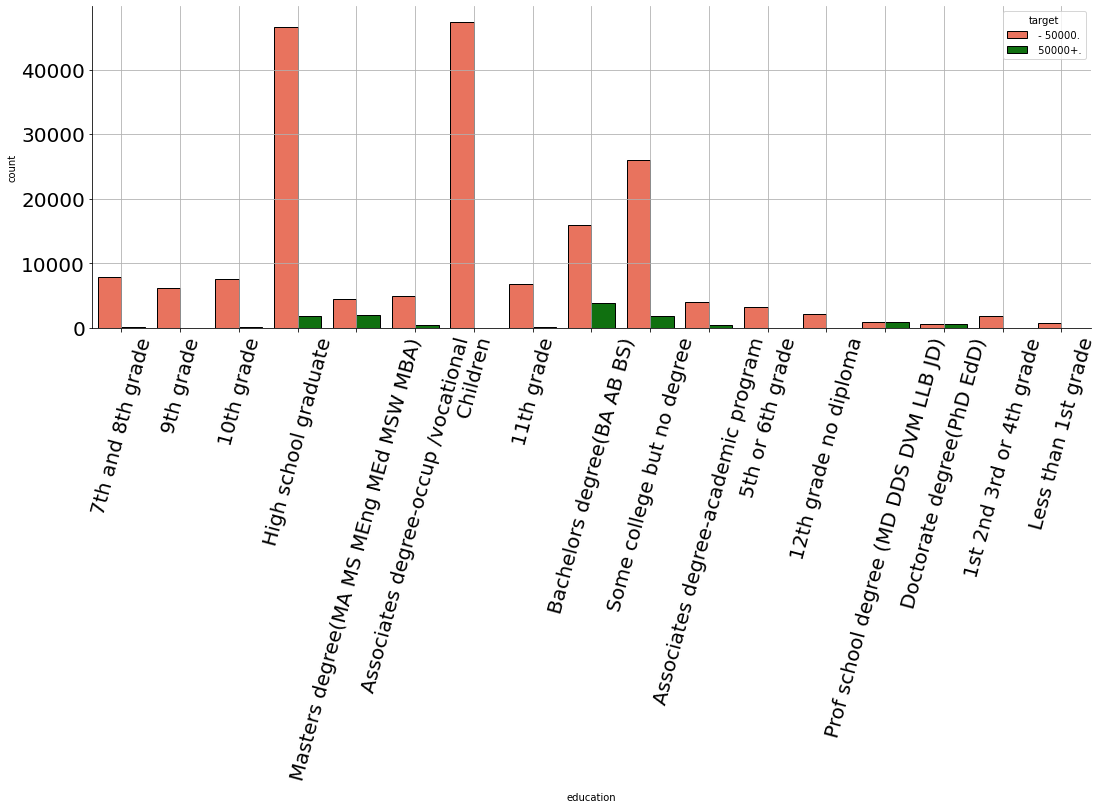

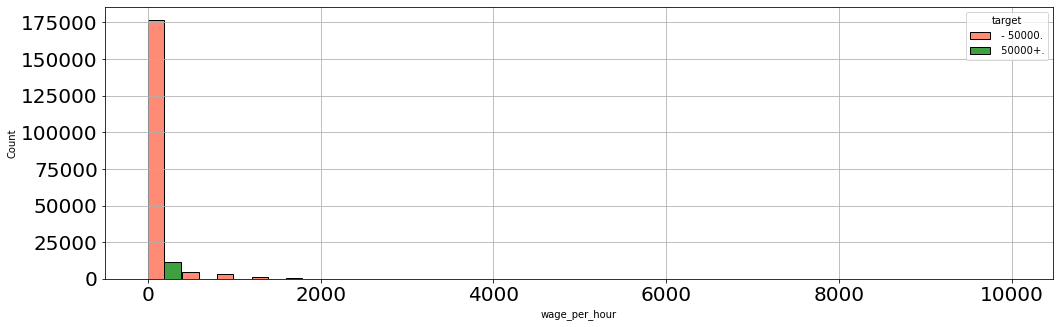

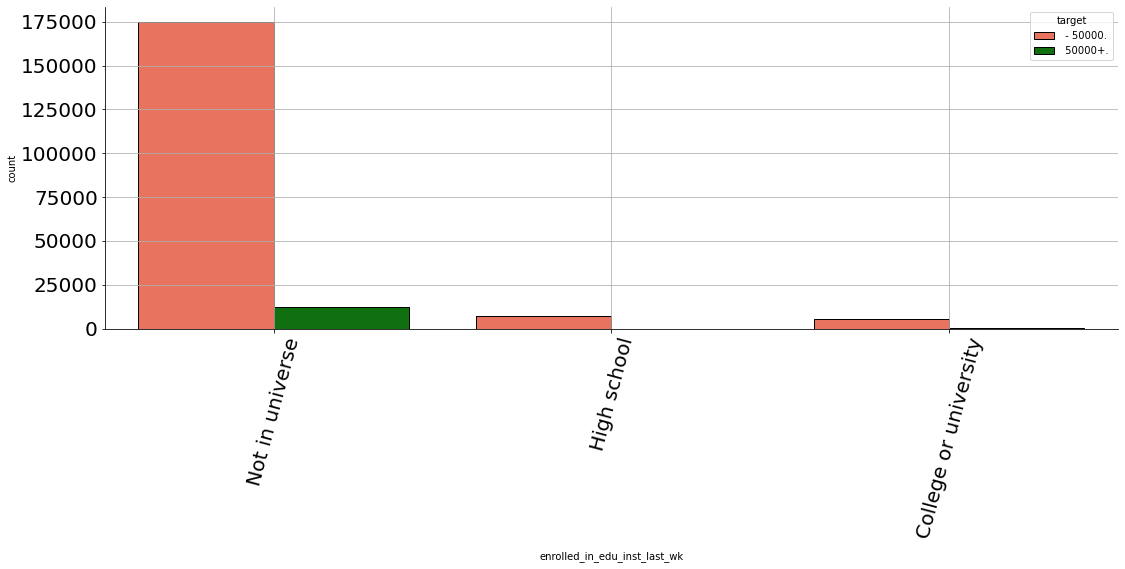

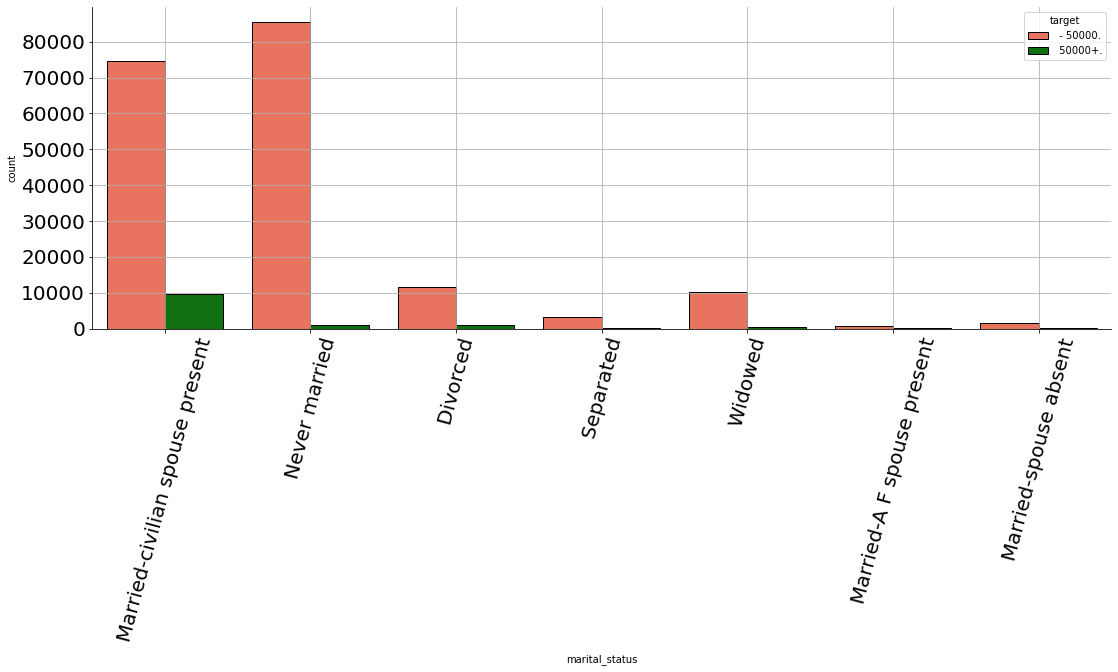

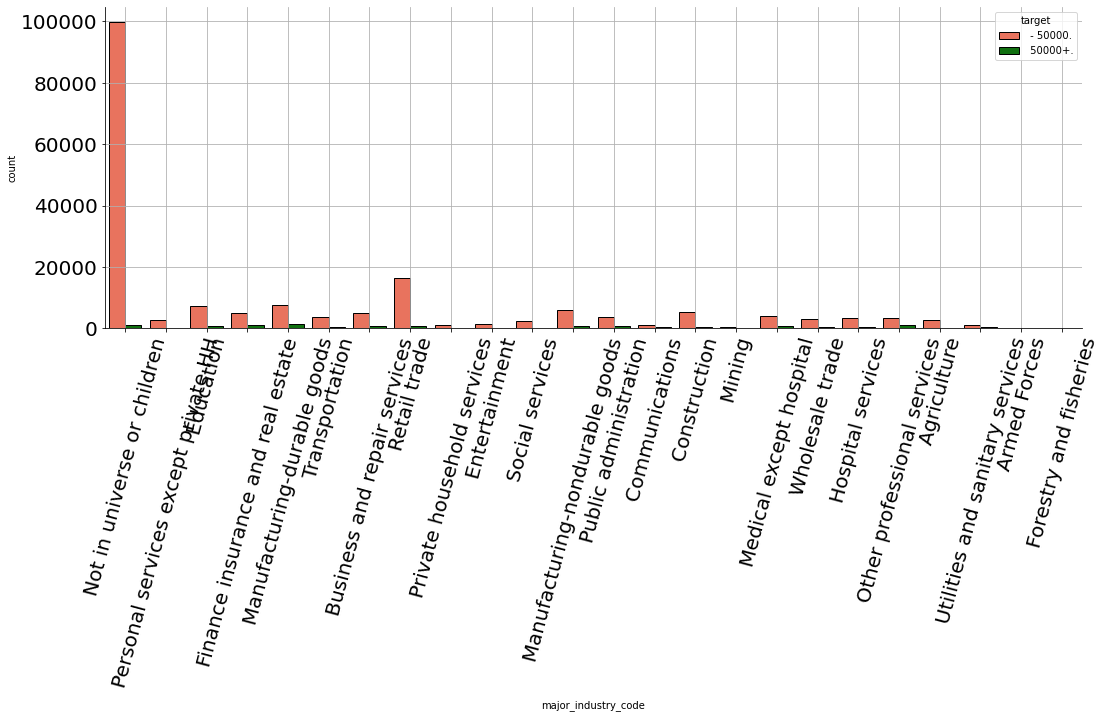

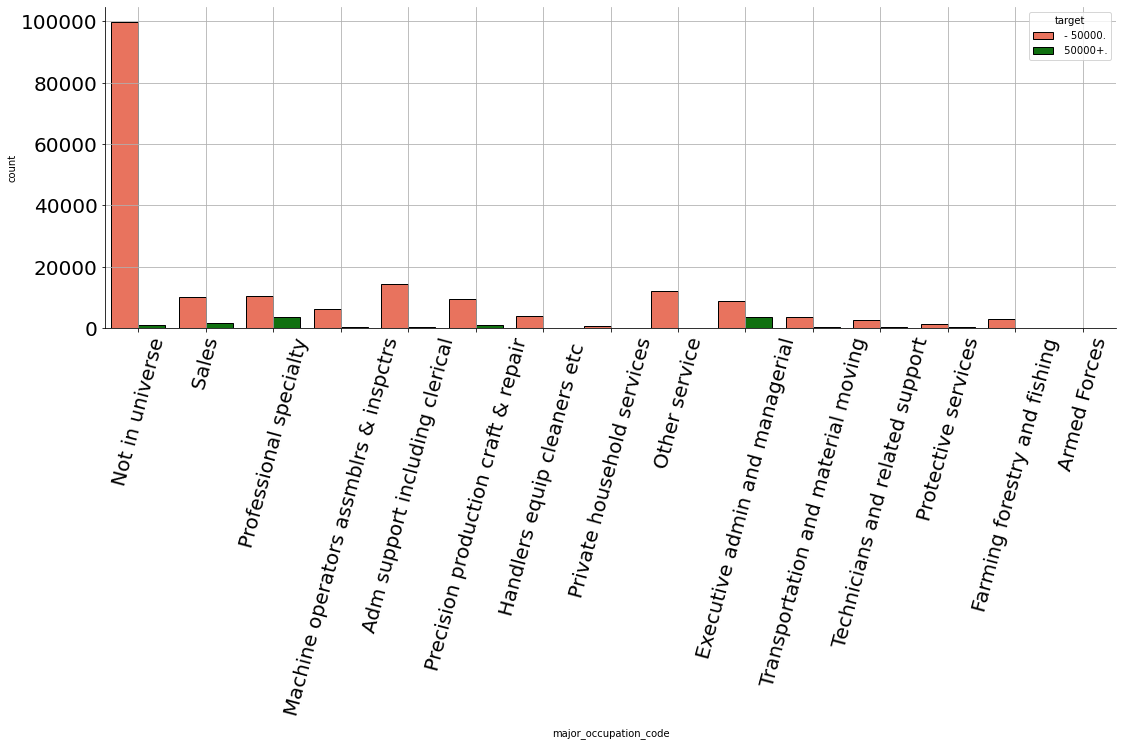

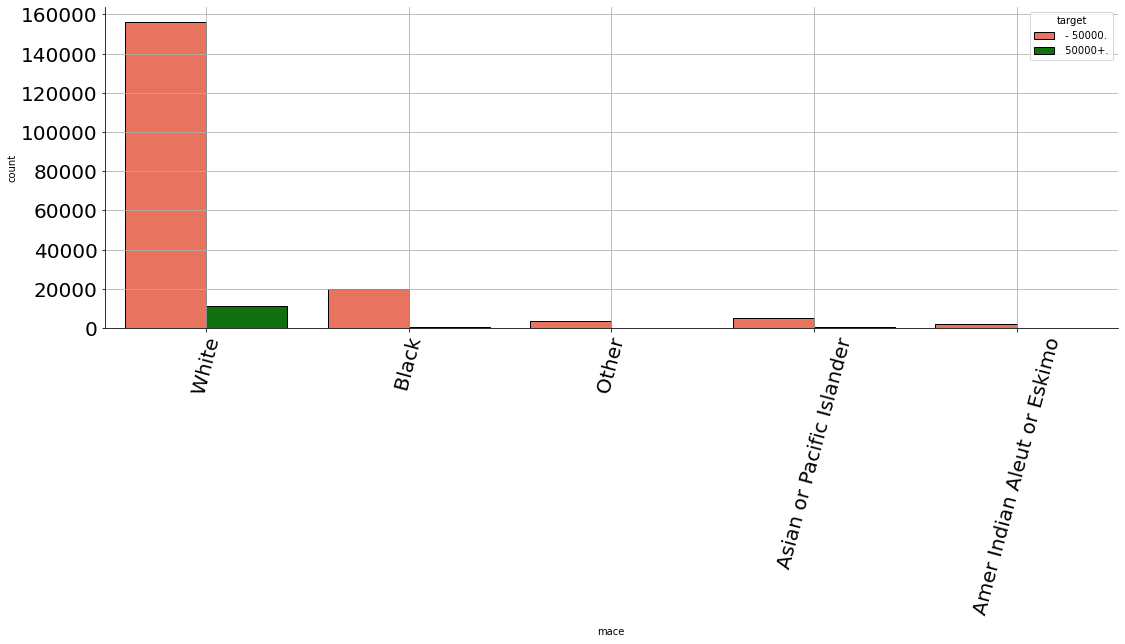

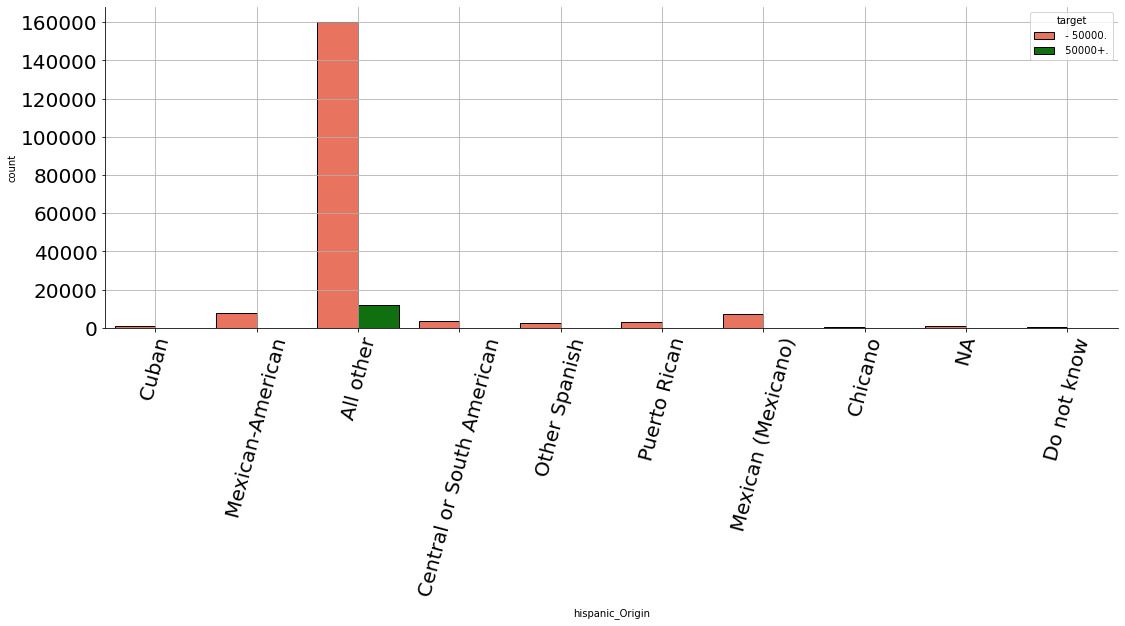

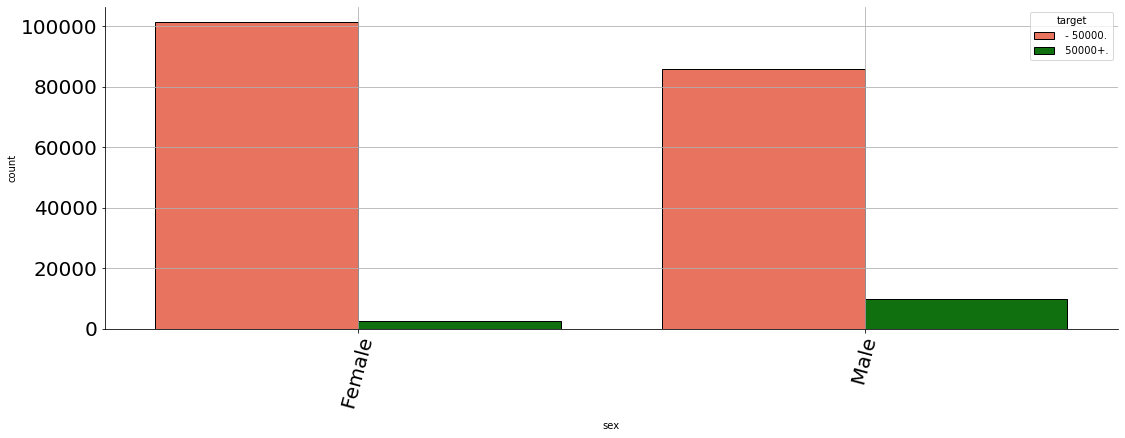

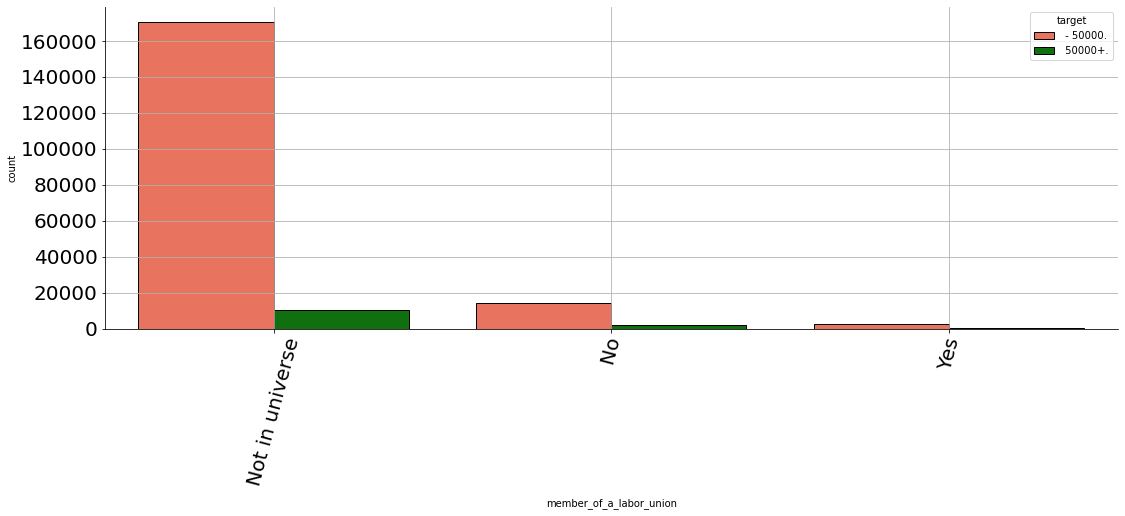

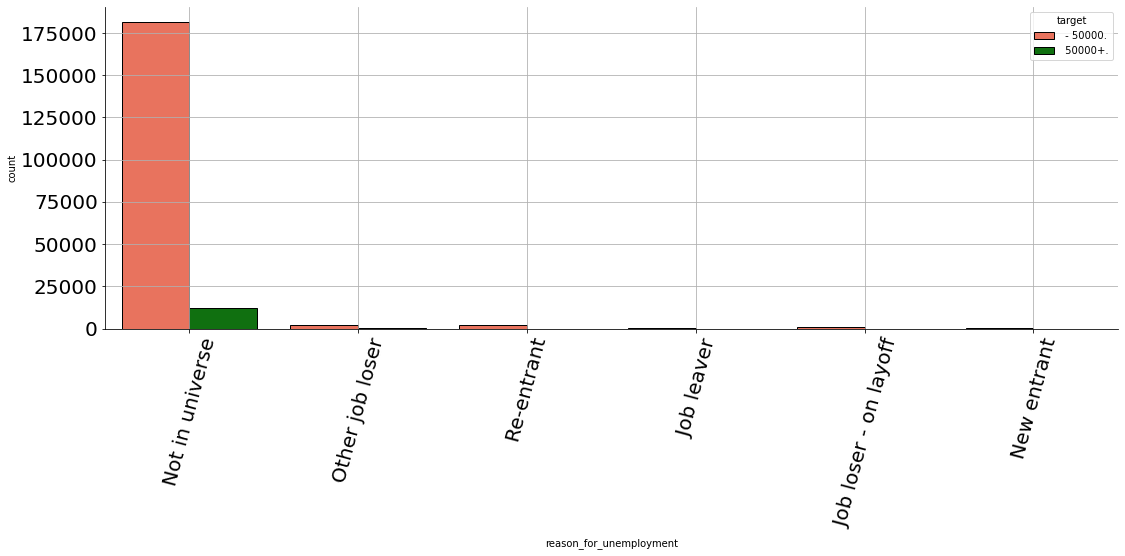

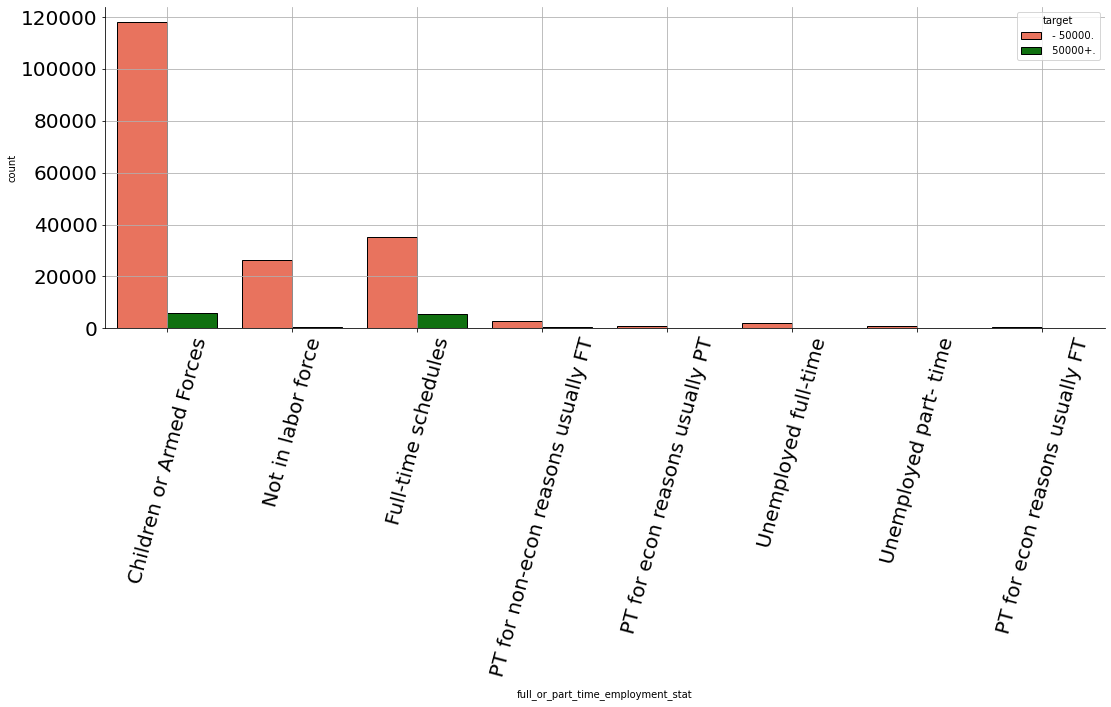

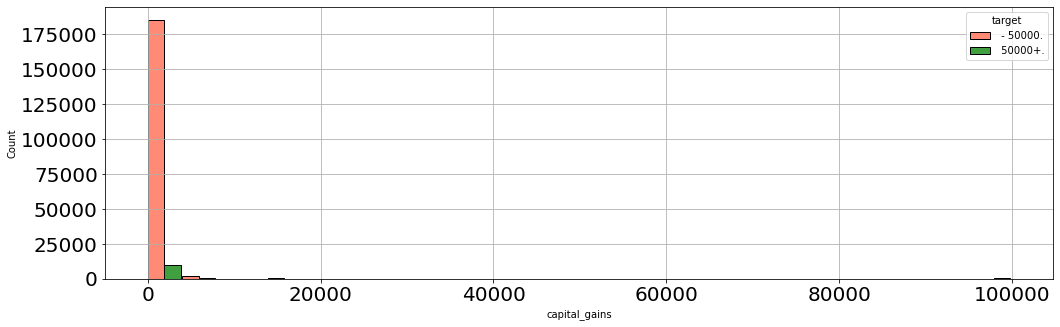

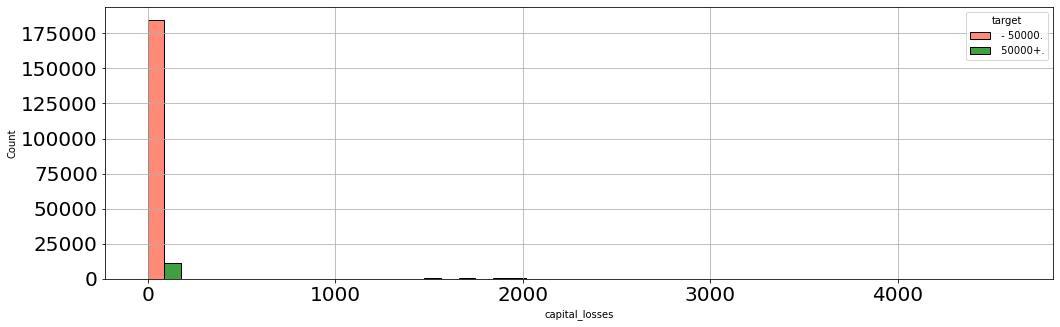

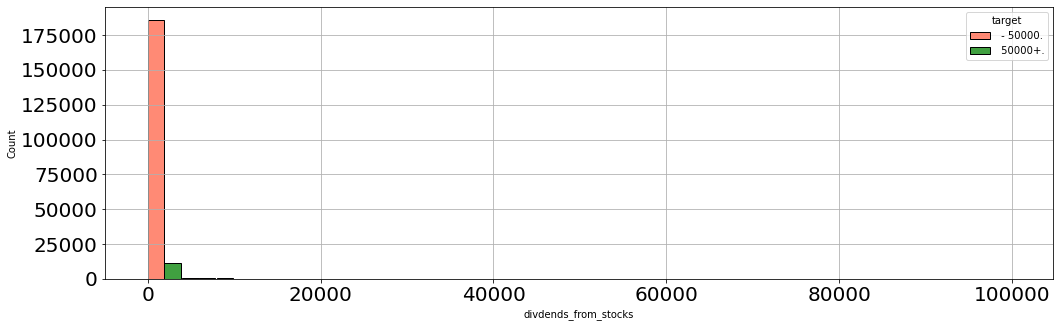

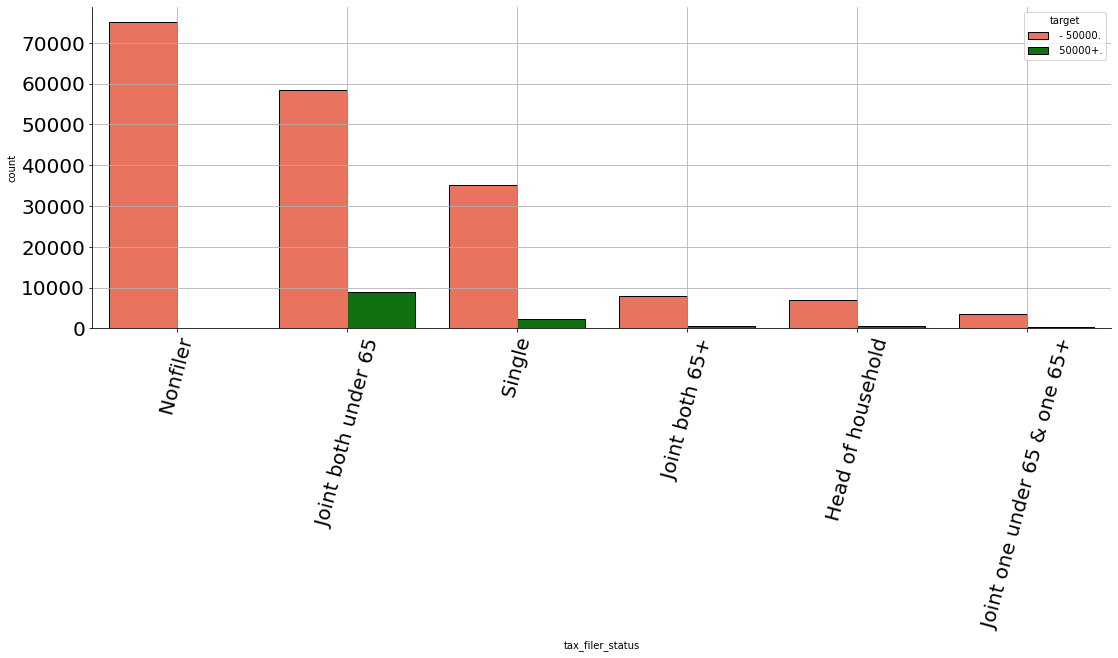

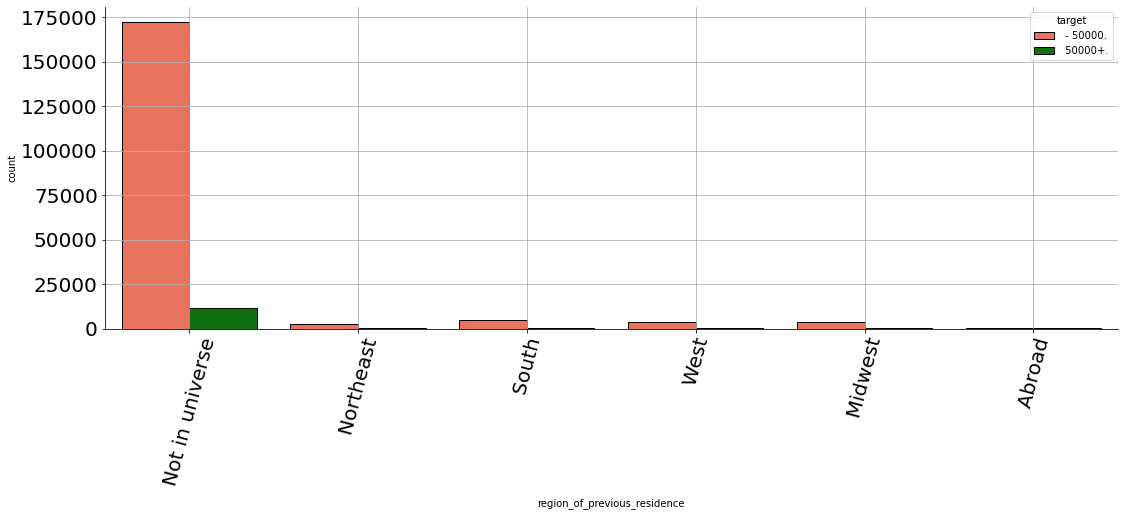

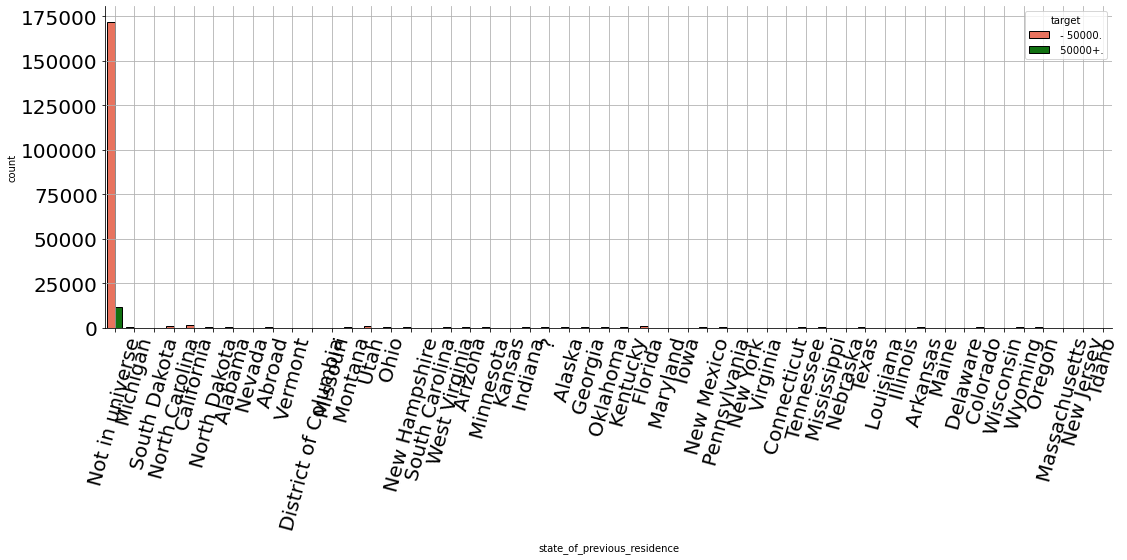

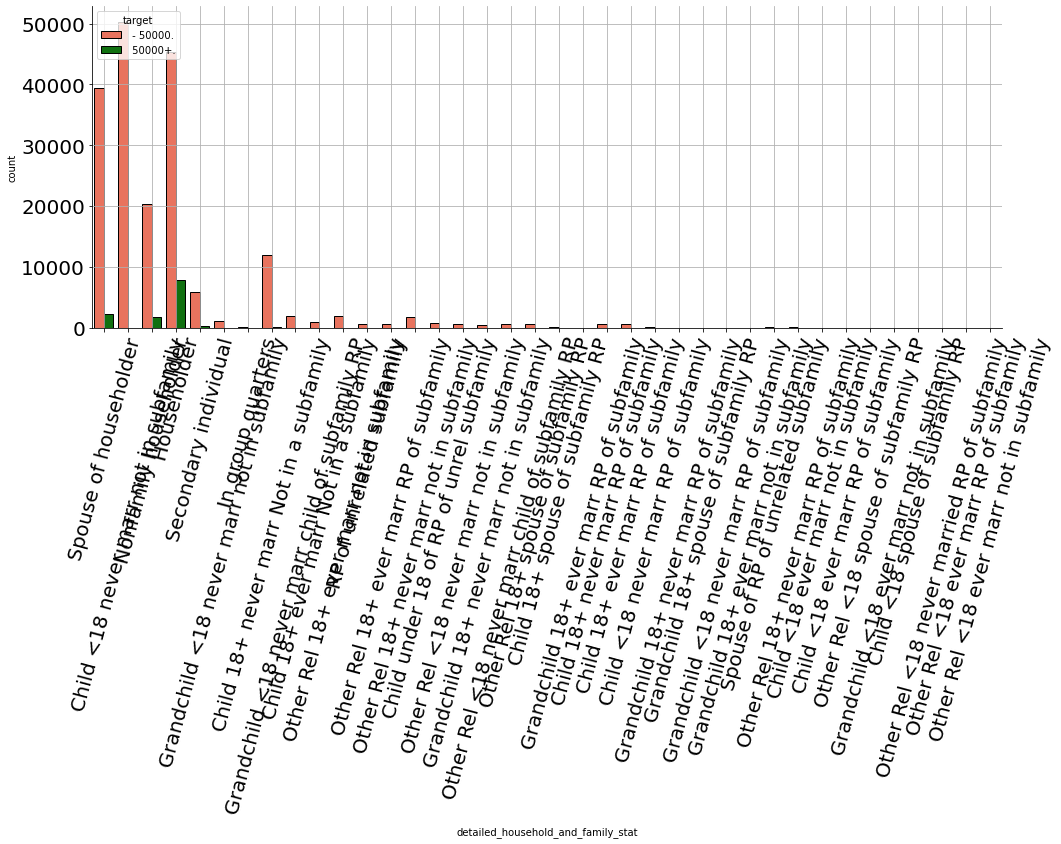

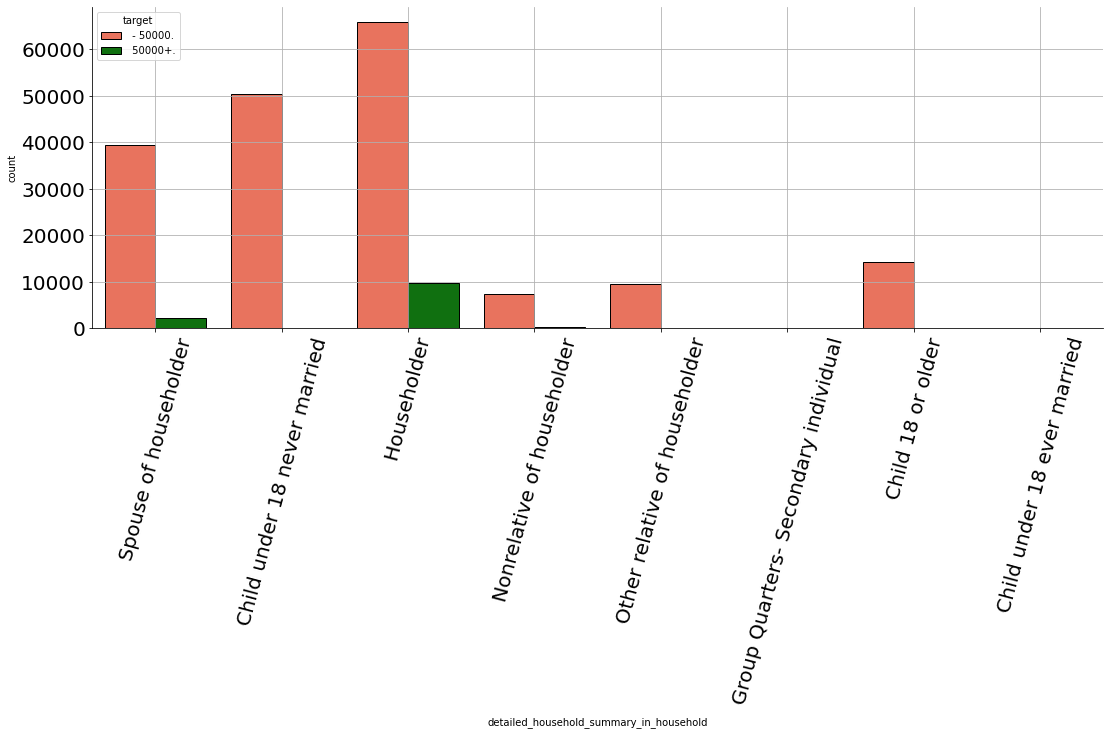

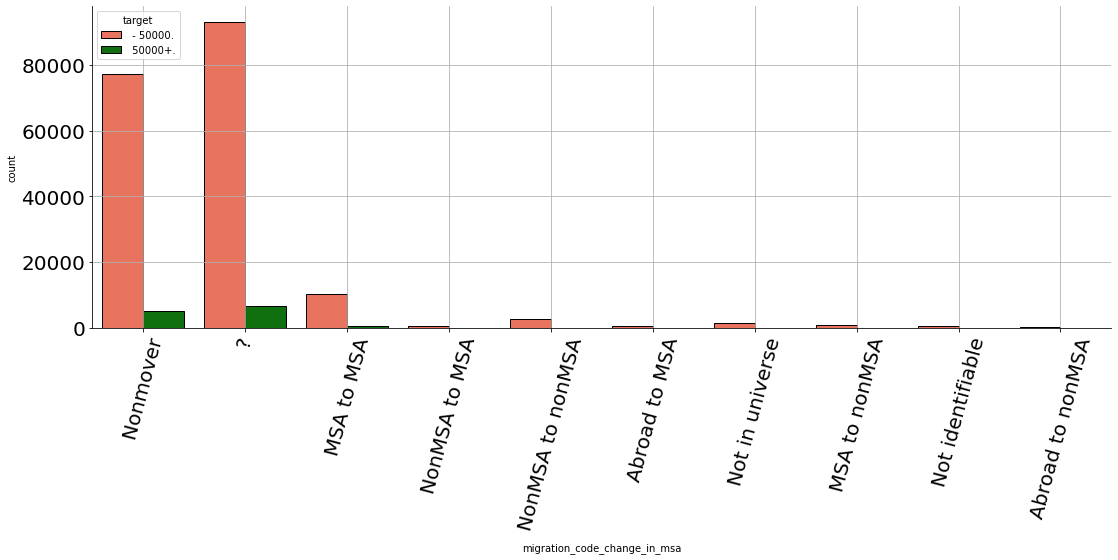

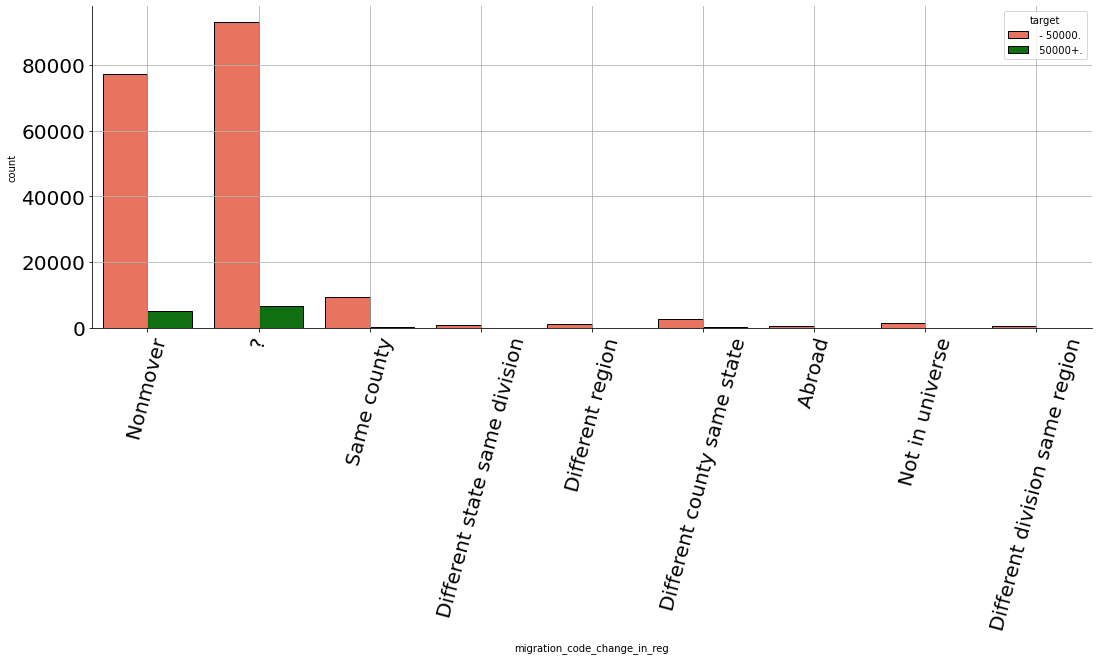

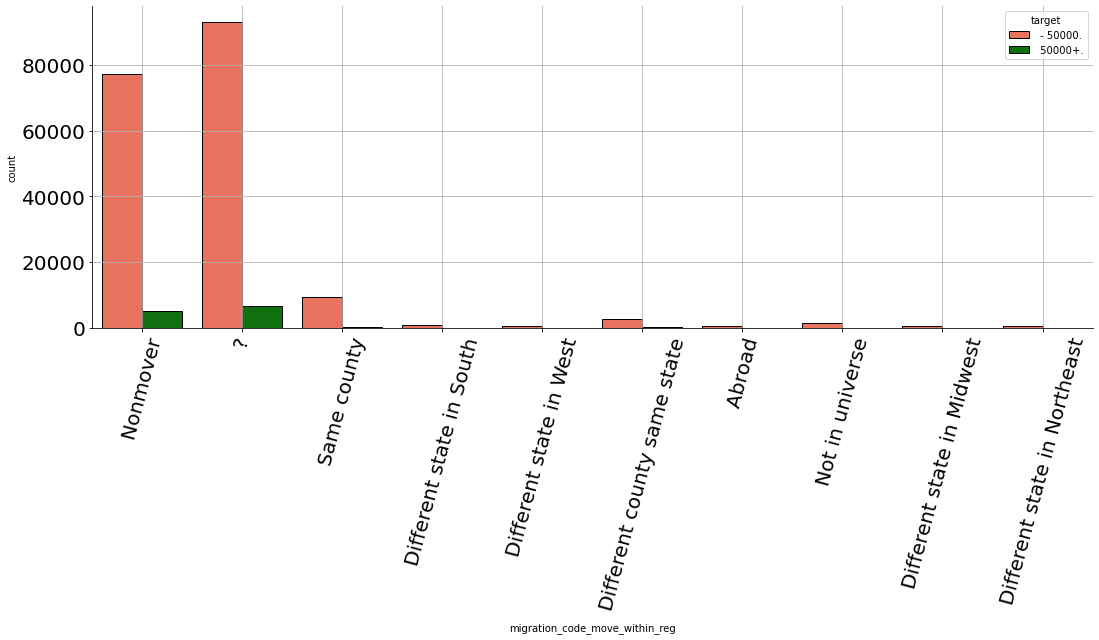

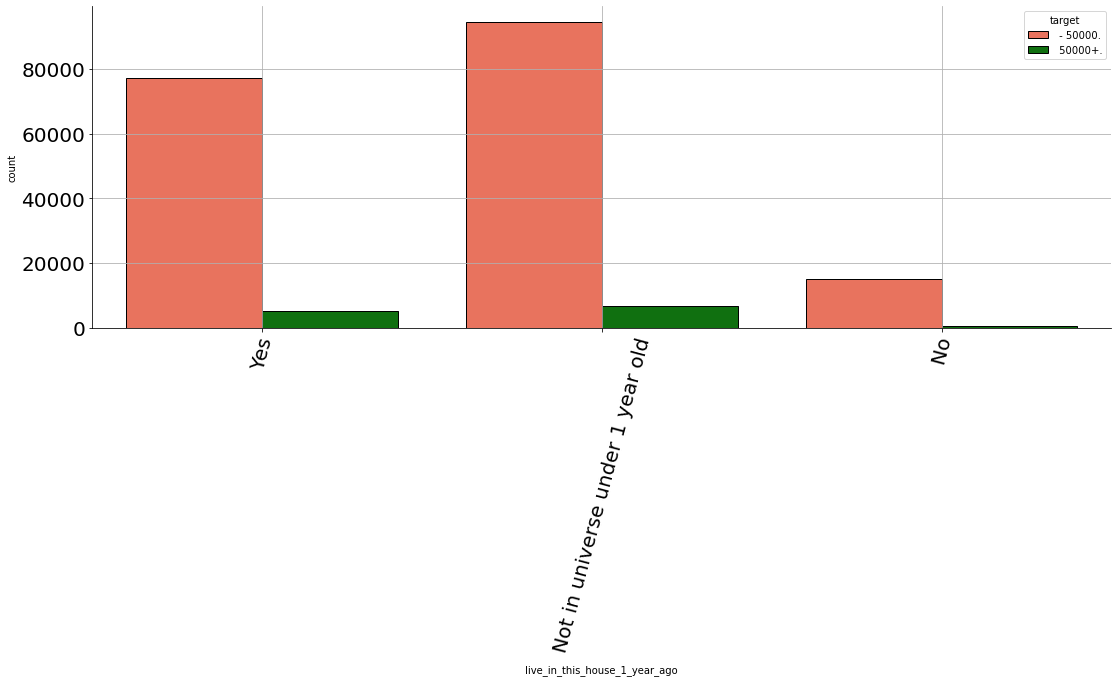

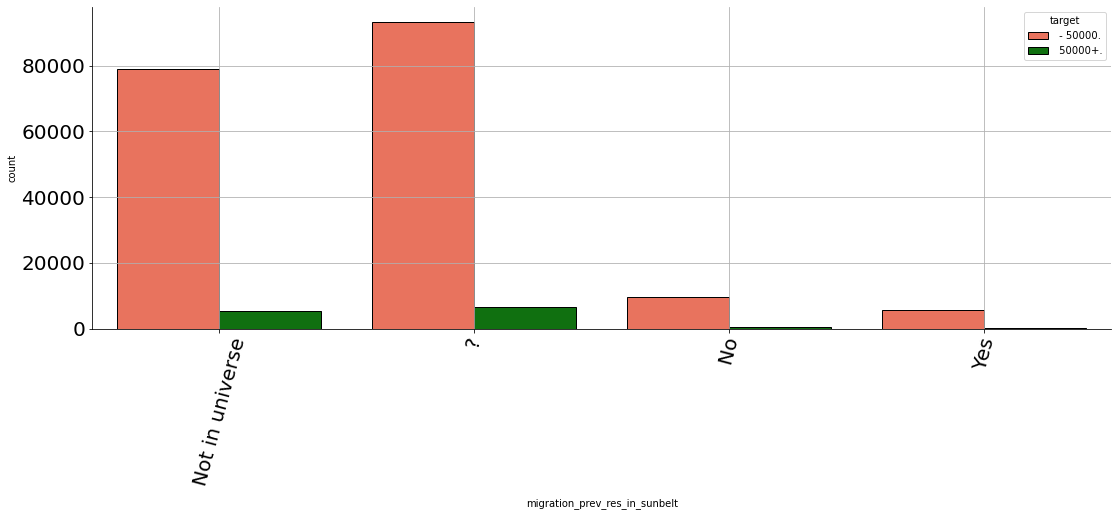

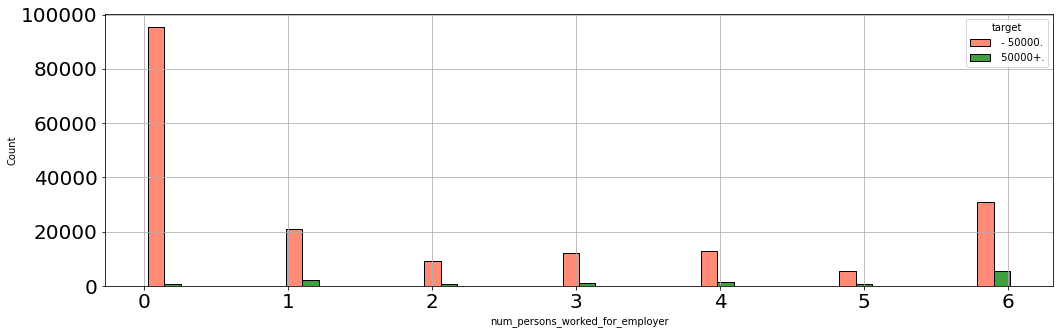

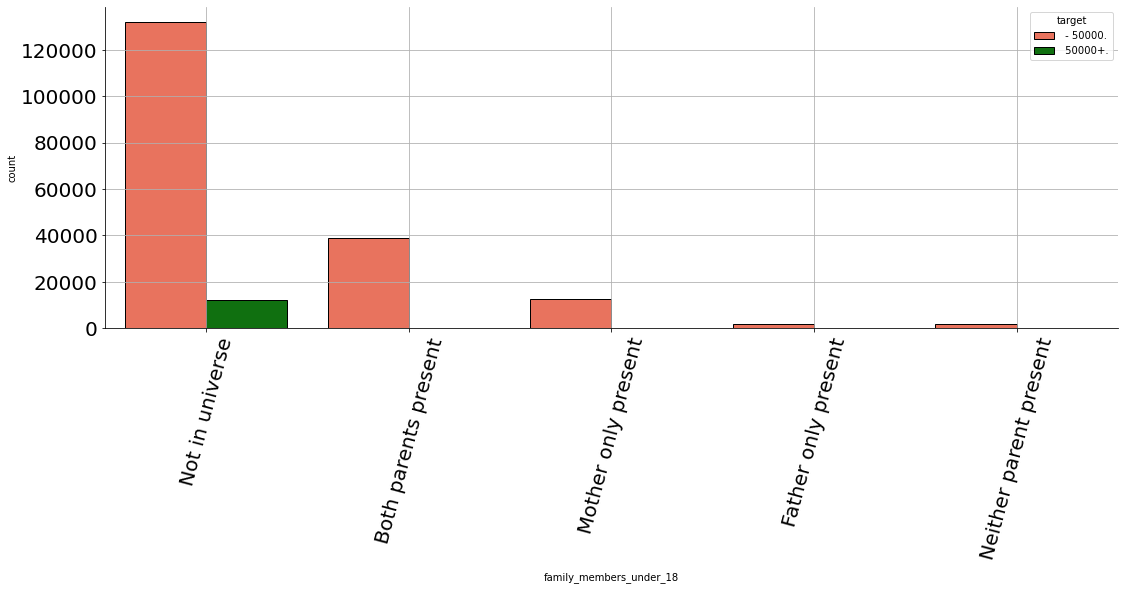

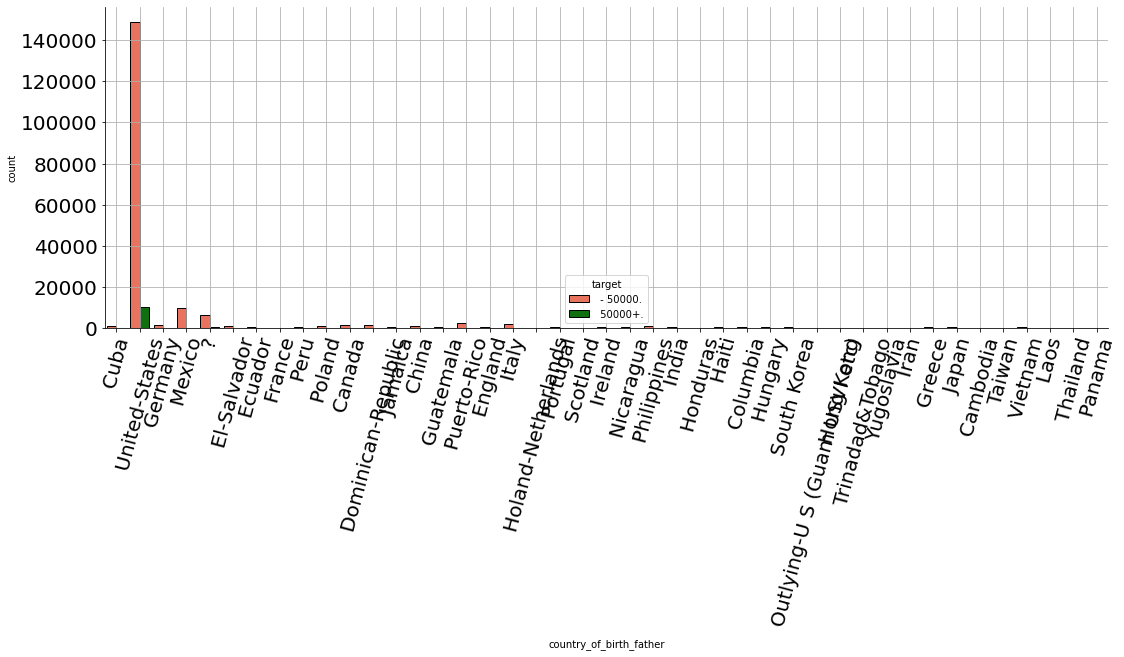

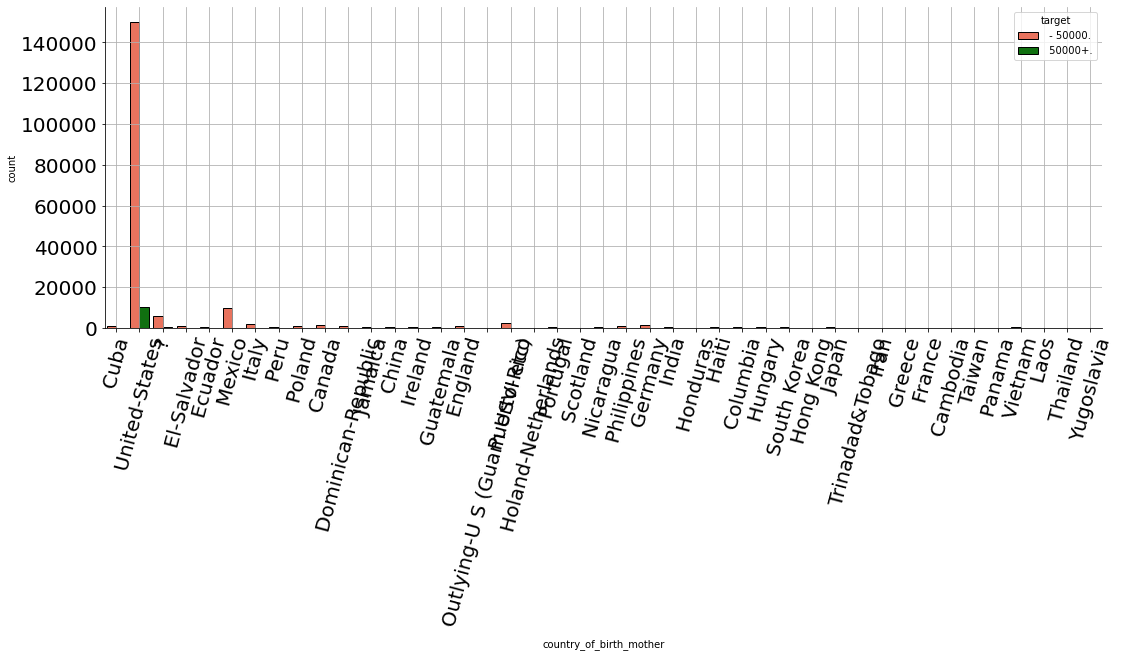

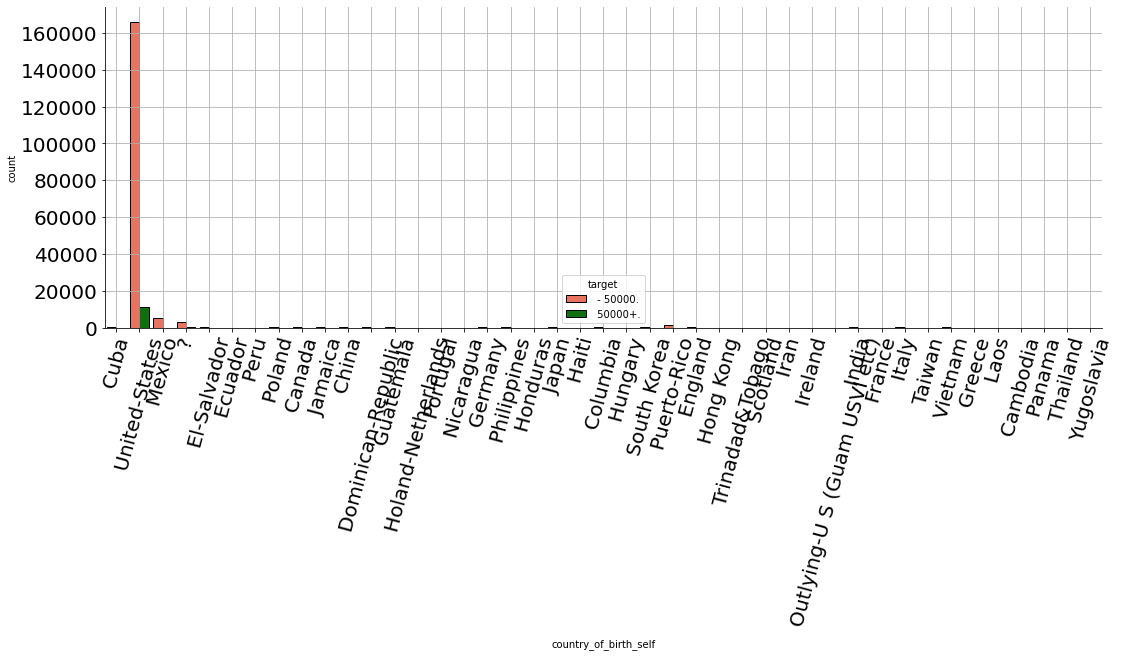

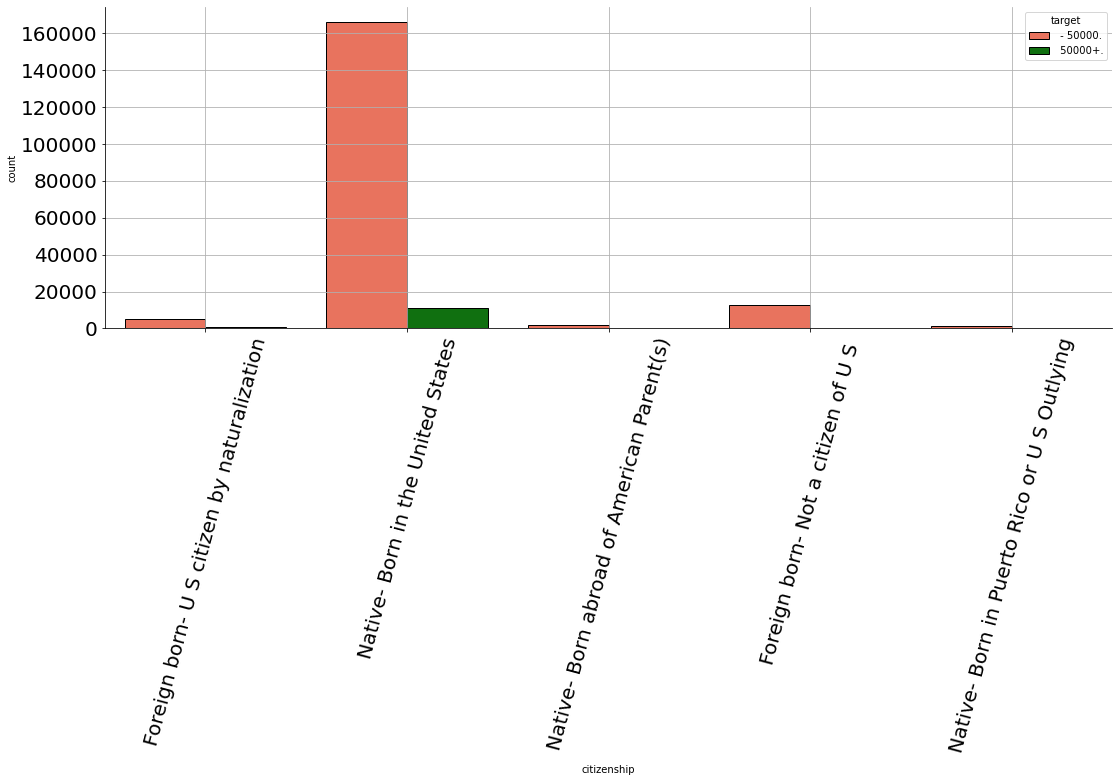

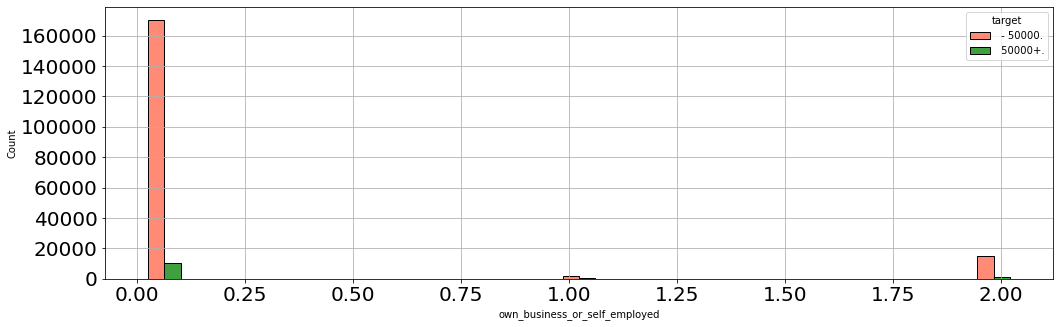

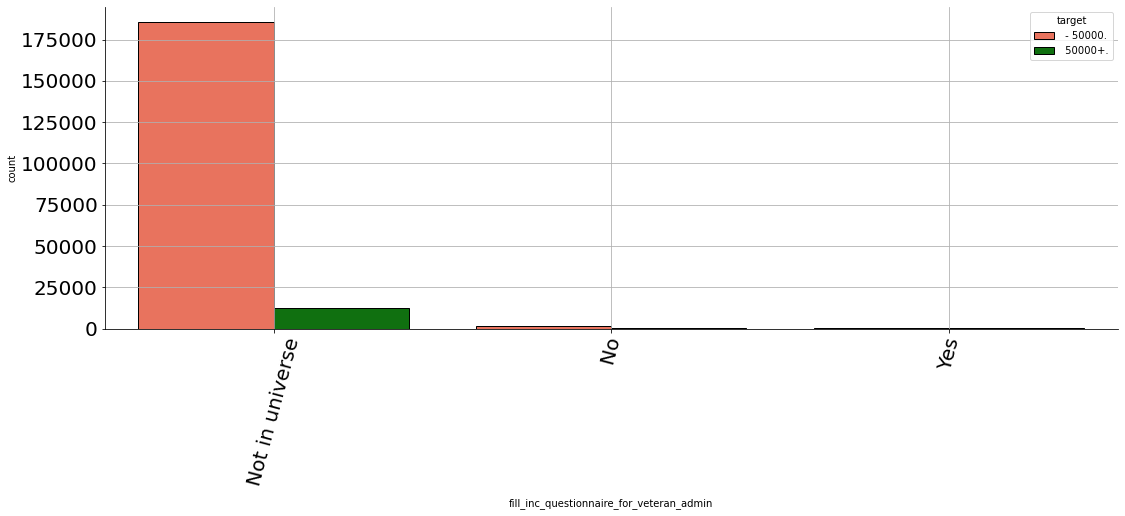

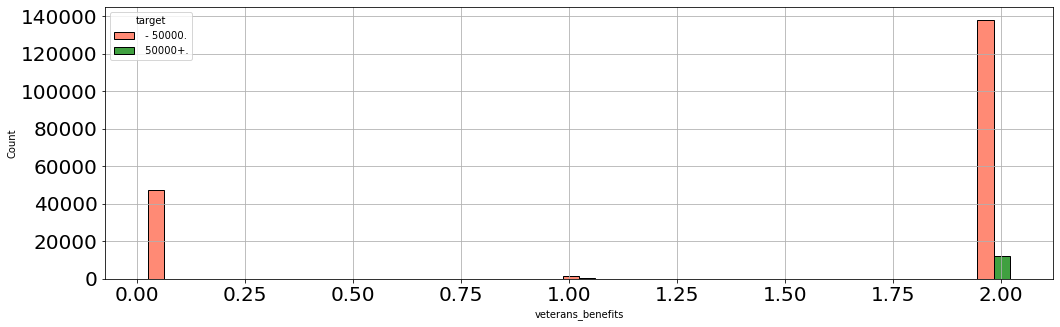

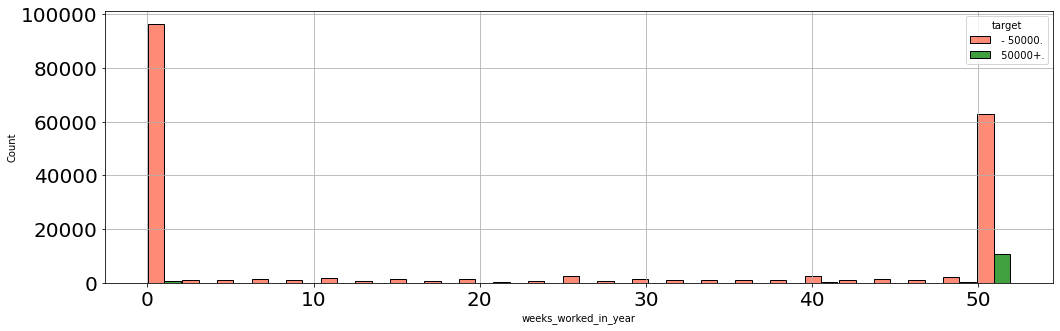

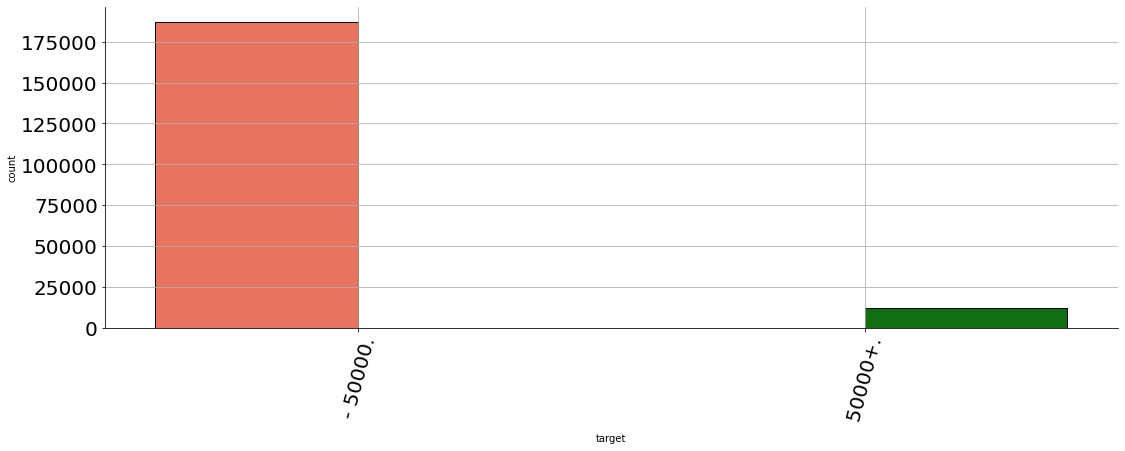

In [17]:
for feature in train.columns:
    
    if is_object_dtype(train[feature]):
        sns.catplot(data=train, 
                    x=feature, 
                    kind="count",
                    hue="target",
                    height=5, 
                    aspect=3,
                    legend_out=False, 
                    edgecolor="black",
                    palette=sns.color_palette(['tomato', 'green'])).set_xticklabels(fontsize=16, rotation=75)
        plt.grid() 
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()
        

        
    
    elif is_numeric_dtype(train[feature]):
        plt.subplots(figsize=(17, 5))
        sns.histplot(data=train, 
                     x=feature, 
                     stat='count', 
                     common_norm=False,
                     hue="target",
                     multiple="dodge", 
                     shrink=0.95, 
                     bins = 25,
                     edgecolor="black",
                     palette=sns.color_palette(['tomato', 'green']))     
        plt.grid() 
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

We will perform **feature selection**, **PCA** and **feature engineering** after encoding.

## ====================================================================

## 2. Data preprocessing

### 2.1. Fill missing values (if there are any)

Let's see how many missing data we have and in which features

In [18]:
print(train.isna().sum())

age                                         0
class_of_worker                             0
industry_code                               0
occupation_code                             0
education                                   0
wage_per_hour                               0
enrolled_in_edu_inst_last_wk                0
marital_status                              0
major_industry_code                         0
major_occupation_code                       0
mace                                        0
hispanic_Origin                             0
sex                                         0
member_of_a_labor_union                     0
reason_for_unemployment                     0
full_or_part_time_employment_stat           0
capital_gains                               0
capital_losses                              0
divdends_from_stocks                        0
tax_filer_status                            0
region_of_previous_residence                0
state_of_previous_residence       

There is no missing data in our dataset, which is good, but we can see that some features have "Not in Universe" and "?" values.

For example:

In [19]:
train[train.country_of_birth_father == ' ?'].shape[0]

6713

In [20]:
train[train == ' ?'] = np.nan
test[test == ' ?'] = np.nan

In [21]:
print(f"==== Percentage of missing data ====           %\n{round(train.isna().sum() / train.shape[0] *100, 1)}")

==== Percentage of missing data ====           %
age                                          0.0
class_of_worker                              0.0
industry_code                                0.0
occupation_code                              0.0
education                                    0.0
wage_per_hour                                0.0
enrolled_in_edu_inst_last_wk                 0.0
marital_status                               0.0
major_industry_code                          0.0
major_occupation_code                        0.0
mace                                         0.0
hispanic_Origin                              0.0
sex                                          0.0
member_of_a_labor_union                      0.0
reason_for_unemployment                      0.0
full_or_part_time_employment_stat            0.0
capital_gains                                0.0
capital_losses                               0.0
divdends_from_stocks                         0.0
tax_filer_status    

Now we see that in fact, not everything is so good with missing data, for four features, **half of the data is missing**, so we will **drop** these features:

- migration_code_change_in_msa
- migration_code_change_in_reg
- migration_code_move_within_reg
- migration_prev_res_in_sunbelt

In [22]:
features_to_drop = ['migration_code_change_in_msa',
                    'migration_code_change_in_reg',
                    'migration_code_move_within_reg',
                    'migration_prev_res_in_sunbelt']

train.drop(features_to_drop, axis=1, inplace=True)
test.drop(features_to_drop, axis=1, inplace=True)

We also see that we have four features with missing values less than 4%:

- state_of_previous_residence (0.4%)
- country_of_birth_father (3.4%)
- country_of_birth_mother (3.1%)
- country_of_birth_self (1.7%)

I will fill missing data for these features with **mode**

In [23]:
features_to_fill = ['state_of_previous_residence',
                    'country_of_birth_father',
                    'country_of_birth_mother',
                    'country_of_birth_self']

for feature in features_to_fill:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(test[feature].mode()[0], inplace=True)

We will leave the "Not in universe" as it is, we will consider it as the answer "others".

### 2.2. Properly encode categorical features. Explain your choice of methods of categorical feature encoding

First let's **encode target** feature as binary, so 1 to 50000+ and 0 to - 50000

In [24]:
train['target'] = train['target'].map({' - 50000.': 0, ' 50000+.': 1})
test['target'] = test['target'].map({' - 50000.': 0, ' 50000+.': 1})

Now let's split the data

In [25]:
y_train = train['target']
y_test = test['target']

X_train = train.drop(['target'], axis=1)
X_test = test.drop(['target'], axis=1) 

We have three types of features:
- Numerical
- Ordinal
- Сategorical

Let's encode categorical features:

In [26]:
categorical_features = ['enrolled_in_edu_inst_last_wk',
                        'marital_status',
                        'major_industry_code',
                        'major_occupation_code',
                        'mace',
                        'hispanic_Origin',
                        'sex',
                        'member_of_a_labor_union',
                        'reason_for_unemployment',
                        'tax_filer_status',
                        'region_of_previous_residence',
                        'state_of_previous_residence',
                        'detailed_household_and_family_stat',
                        'detailed_household_summary_in_household',
                        'live_in_this_house_1_year_ago',
                        'family_members_under_18',
                        'country_of_birth_father',
                        'country_of_birth_mother',
                        'country_of_birth_self',
                        'citizenship',
                        'fill_inc_questionnaire_for_veteran_admin']

In [27]:
for feature in categorical_features:
        le = LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [28]:
ordinal_features = ['full_or_part_time_employment_stat', 
                    'education',
                    'class_of_worker']

In [29]:
for feature in ordinal_features:
    ode = OrdinalEncoder()
    X_train[feature] = ode.fit_transform(X_train[[feature]])
    X_test[feature] = ode.fit_transform(X_test[[feature]])

PCA is affected by scale, so you need to scale the features in your data before applying PCA.

Feature Scaling:

In [30]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

**Principal component analysis (PCA)**

Let's see which features have the least impact on our model, and exclude the most insignificant ones.

In [31]:
X_train.head(3)

age  class_of_worker  industry_code  occupation_code  education  \
0  1.322487        -0.439146      -0.849740        -0.782235  -1.222134   
1 -0.828933        -0.439146      -0.849740        -0.782235  -0.979469   
2  0.470883         0.465605       1.308882         0.532265  -2.435461   

   wage_per_hour  enrolled_in_edu_inst_last_wk  marital_status  \
0      -0.201629                      0.244533       -0.713995   
1      -0.201629                     -2.426254        0.706081   
2      -0.201629                      0.244533       -0.713995   

   major_industry_code  major_occupation_code  ...  \
0             0.207994              -0.097301  ...   
1             0.207994              -0.097301  ...   
2             0.626550               1.835344  ...   

   num_persons_worked_for_employer  family_members_under_18  \
0                        -0.827096                 0.589025   
1                        -0.827096                -1.901181   
2                        -0.404284                 0.589025   

   country_of_birth_father  country_of_birth_mother  country_of_birth_self  \
0                -3.842095                -3.874046              -5.082583   
1                 0.381853                 0.377326               0.277837   
2                 0.381853                 0.377326               0.277837   

   citizenship  own_business_or_self_employed  \
0    -2.355192                      -0.316851   
1     0.343561                      -0.316851   
2     0.343561                      -0.316851   

   fill_inc_questionnaire_for_veteran_admin  veterans_benefits  \
0                                  0.060524           0.569799   
1                                  0.060524           0.569799   
2                                  0.060524           0.569799   

   weeks_worked_in_year  
0             -0.949346  
1             -0.949346  
2              0.853088  

[3 rows x 35 columns]

In [32]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
pca.explained_variance_ratio_

array([0.16204372, 0.09046653, 0.06965968, 0.04332083, 0.04015476,
       0.03622049, 0.0331111 , 0.03260773, 0.03084095, 0.03049465,
       0.03002411, 0.02963745, 0.02916357, 0.02784346, 0.02597498,
       0.02529568, 0.02479709, 0.02362408, 0.02273142, 0.02236662,
       0.02215329, 0.02144507, 0.01876525, 0.01720654, 0.01634601,
       0.01367057, 0.01224367, 0.01116911, 0.00902194, 0.00689207,
       0.00591581, 0.00573817, 0.0047213 , 0.00349232, 0.00083999])

Names of features seen during fit:

In [33]:
pca.feature_names_in_

array(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'mace', 'hispanic_Origin', 'sex', 'member_of_a_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'divdends_from_stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence',
       'detailed_household_and_family_stat',
       'detailed_household_summary_in_household',
       'live_in_this_house_1_year_ago', 'num_persons_worked_for_employer',
       'family_members_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
       'own_business_or_self_employed',
       'fill_inc_questionnaire_for_veteran_admin', 'veterans_benefits',
       'weeks_worked_in_year'], dtype=object)

The following three features explain less than 1% of our model, so we will drop them:
- fill_inc_questionnaire_for_veteran_admin
- veterans_benefits
- weeks_worked_in_year

In [34]:
(0.0047213 + 0.00349232 + 0.00083999)*100

0.9053610000000002

In [35]:
features_to_drop_by_pca = ['fill_inc_questionnaire_for_veteran_admin',
                           'veterans_benefits',
                           'weeks_worked_in_year']

X_train.drop(features_to_drop_by_pca, axis=1, inplace=True)
X_test.drop(features_to_drop_by_pca, axis=1, inplace=True)

### 2.3. Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

We will perform **k-means** clustering. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

reference: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [36]:
for k in range(1, 400, 50):   
    k_means = KMeans(n_clusters = k)
    clusters = k_means.fit_predict(X_train)  
    pred = pd.DataFrame(list(zip(clusters, y_train)), columns = ['cluster', 'target'])
    pred['prediction'] = np.nan
    clusters_dict = dict()      
    for cluster in np.unique(clusters):
        x = pred[pred['cluster'] == cluster]['target']
        y_pred = x.mean()
        clusters_dict[cluster] = y_pred
    
    pred['prediction'] = [clusters_dict[i] for i in pred['cluster']]
    pred['prediction_class'] = [round(clusters_dict[i]) for i in pred['cluster']]
    
    print(f" Number of clusters: {k} => {round(f1_score(y_train, pred['prediction_class']), 2)}")

 Number of clusters: 1 => 0.0
 Number of clusters: 51 => 0.07
 Number of clusters: 101 => 0.07
 Number of clusters: 151 => 0.17
 Number of clusters: 201 => 0.1
 Number of clusters: 251 => 0.18
 Number of clusters: 301 => 0.18
 Number of clusters: 351 => 0.16


We see that the jump occurred on about 100 clusters

In [37]:
k_means = KMeans(n_clusters = 100)
k_means.fit(X_train)
X_train['cluster'] = k_means.predict(X_train)

In [38]:
k_means = KMeans(n_clusters = 100)
k_means = k_means.fit(X_test)
X_test['cluster'] = k_means.predict(X_test)

Scaling 'cluster' feature:

In [39]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

## ====================================================================

## 3. Model training

### 3.1. Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)

First, let's find the most appropriate **hyperparameters** for logical regression model, then with the help of this base model we will estimate how the various techniques help to work with unbalanced data.

Logical regression without tuning hypeparameters:

In [40]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'Logistic Regression "base model" score:')
compute_metrics(y_test, y_pred)

Logistic Regression "base model" score:
1. Accuracy: 0.9459
2. F-score: 0.3559
3. Precision: 0.6799
4. Recall: 0.2410
5. Accuracy (balanced): 0.6168
6. MCC: 0.3841


**Logistic Regression**

In [41]:
LogisticRegression_pipe = Pipeline([('estimator', LogisticRegression(max_iter=100, n_jobs=-1))])

LogisticRegression_param_grid = {'estimator__penalty': ['l2'],    # tested for ['none', 'l2', 'elasticnet']
                                 'estimator__C': [0.5, 1, 1.5],   # tested for [0.1, 0.5, 1, 1.5, 2, 5]
                                 'estimator__solver' : ['lbfgs']} # tested for ['newton-cg', 'sag', 'saga',  'lbfgs']

lr_cv = GridSearchCV(estimator=LogisticRegression_pipe,
                     param_grid=LogisticRegression_param_grid,
                     cv=5,                                         # the number of folds in a Stratified KFold
                     scoring='f1', 
                     verbose=3,
                     n_jobs = -1)

lr_cv.fit(X_train, y_train)
y_pred_lr = lr_cv.best_estimator_.predict(X_test)
print(lr_cv.best_estimator_)

print(f'Logistic Regression "best model" score:')
compute_metrics(y_test, y_pred_lr)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Pipeline(steps=[('estimator', LogisticRegression(C=1, n_jobs=-1))])
Logistic Regression "best model" score:
1. Accuracy: 0.9459
2. F-score: 0.3559
3. Precision: 0.6799
4. Recall: 0.2410
5. Accuracy (balanced): 0.6168
6. MCC: 0.3841


Train a Logistic Regression with ".best_estimator_" hyperparameters to compare how different approaches help to work with imbalanced data.

In [42]:
lr_best = lr_cv.best_estimator_

**SMOTE** Synthetic Minority Over-sampling Technique.

In [43]:
smote = SMOTE(sampling_strategy=0.8)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

lr_best.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_best.predict(X_test)

print(f'Logistic Regression with "smote" score:')
compute_metrics(y_test, y_pred_smote)

Logistic Regression with "smote" score:
1. Accuracy: 0.8468
2. F-score: 0.3984
3. Precision: 0.2633
4. Recall: 0.8180
5. Accuracy (balanced): 0.8333
6. MCC: 0.4077


**BorderlineSMOTE** 

Over-sampling using Borderline SMOTE.
This algorithm is a variant of the original SMOTE algorithm. Borderline samples will be detected and used to generate new synthetic samples.

In [44]:
blsmote = BorderlineSMOTE(kind='borderline-1', sampling_strategy=0.8)
X_train_blsmote, y_train_blsmote = blsmote.fit_resample(X_train, y_train)

lr_best.fit(X_train_blsmote, y_train_blsmote)
y_pred_blsmote = lr_best.predict(X_test)

print(f'Logistic Regression with "BorderlineSMOTE" score:')
compute_metrics(y_test, y_pred_blsmote)

Logistic Regression with "BorderlineSMOTE" score:
1. Accuracy: 0.8405
2. F-score: 0.3919
3. Precision: 0.2566
4. Recall: 0.8288
5. Accuracy (balanced): 0.8350
6. MCC: 0.4038


**RandomOverSampler** 

Class to perform random over-sampling.
Object to over-sample the minority class(es) by picking samples at random with replacement.

In [45]:
ros = RandomOverSampler(sampling_strategy=0.8)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

lr_best.fit(X_train_ros, y_train_ros)
y_pred_ros = lr_best.predict(X_test)

print(f'Logistic Regression with "RandomOverSampler" score:')
compute_metrics(y_test, y_pred_ros)

Logistic Regression with "RandomOverSampler" score:
1. Accuracy: 0.8440
2. F-score: 0.3970
3. Precision: 0.2611
4. Recall: 0.8285
5. Accuracy (balanced): 0.8367
6. MCC: 0.4085


**SMOTETomek** 

Over-sampling using SMOTE and cleaning using Tomek links.
Combine over- and under-sampling using SMOTE and Tomek links.

In [46]:
smotk = SMOTETomek(sampling_strategy=0.8)
X_train_smotk, y_train_smotk = smotk.fit_resample(X_train, y_train)

lr_best.fit(X_train_smotk, y_train_smotk)
y_pred_smotk = lr_best.predict(X_test)

print(f'Logistic Regression with "SMOTETomek" score:')
compute_metrics(y_test, y_pred_smotk)

Logistic Regression with "SMOTETomek" score:
1. Accuracy: 0.8464
2. F-score: 0.3972
3. Precision: 0.2624
4. Recall: 0.8162
5. Accuracy (balanced): 0.8323
6. MCC: 0.4062


**ADASYN**

Oversample using Adaptive Synthetic (ADASYN) algorithm.
This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled

In [47]:
adasyn = ADASYN(sampling_strategy=0.8, n_neighbors=5, random_state=13)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

lr_best.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = lr_best.predict(X_test)

print(f'Logistic Regression with "SMOTETomek" score:')
compute_metrics(y_test, y_pred_adasyn)

Logistic Regression with "SMOTETomek" score:
1. Accuracy: 0.8179
2. F-score: 0.3691
3. Precision: 0.2350
4. Recall: 0.8590
5. Accuracy (balanced): 0.8371
6. MCC: 0.3884


**Conclusions:**

We can see that the results with different techniques have improved significantly. Judging by F1, the best results are obtained when using SMOTE, judging by balanced accuracy, the best results are obtained when using ADASYN. So let's stick to SMOTE.

### 3.2. Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models

Now let's train different models on the data using **SMOTE** and compare the results.

**LogisticRegression**

In [48]:
LogisticRegression_pipe = Pipeline([('estimator', LogisticRegression(max_iter=100, n_jobs=-1))])

LogisticRegression_param_grid = {'estimator__penalty': ['l2'],         
                                 'estimator__C': [0.1, 0.5, 1, 1.5, 2, 5],
                                 'estimator__solver' : ['lbfgs']}       

lr_cv = GridSearchCV(estimator=LogisticRegression_pipe,
                     param_grid=LogisticRegression_param_grid,
                     cv=5,  # the number of folds in a Stratified KFold
                     scoring='f1', 
                     verbose=3,
                     n_jobs = -1)

lr_cv.fit(X_train_smote, y_train_smote)
y_pred_lr = lr_cv.best_estimator_.predict(X_test)
print(lr_cv.best_estimator_)

print(f'Logistic Regression with "SMOTE" score:')
compute_metrics(y_test, y_pred_lr)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Pipeline(steps=[('estimator', LogisticRegression(C=2, n_jobs=-1))])
Logistic Regression with "SMOTE" score:
1. Accuracy: 0.8468
2. F-score: 0.3983
3. Precision: 0.2633
4. Recall: 0.8178
5. Accuracy (balanced): 0.8333
6. MCC: 0.4076


**XGBClassifier**

In [70]:
XGBClassifier_pipe = Pipeline([('estimator', XGBClassifier(n_jobs=-1))])

XGBClassifier_param_grid = [{'estimator': [XGBClassifier()],
                             'estimator__objective': ['binary:logistic'],
                             'estimator__n_estimators': [200],             # tested for [100, 200]
                             'estimator__learning_rate': [0.1],            # tested for [0.1, 0.2, 0.3, 0.8],
                             'estimator__eta': [0.1],                      # tested for [0.1, 0.2, 0.5, 1]               
                             'estimator__max_depth': [8, 9]}]              # tested for [2, 3, 6, 8, 9, 10]   

xgb_cv = GridSearchCV(estimator=XGBClassifier_pipe,
                      param_grid=XGBClassifier_param_grid,
                      cv=5, 
                      scoring='f1',
                      verbose=3,
                      n_jobs = -1)

xgb_cv.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_cv.best_estimator_.predict(X_test.values)
print(xgb_cv.best_estimator_)
print(f'XGBClassifier with "SMOTE" score:')
compute_metrics(y_test, y_pred_xgb)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Pipeline(steps=[('estimator',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.1,
                               eval_metric=None, feature_types=None, gamma=0,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=9, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_

**LGBMClassifier**

In [50]:
LGBMClassifier_pipe = Pipeline([('estimator', LGBMClassifier(n_jobs=-1))])

LGBMClassifier_param_grid = [{'estimator': [LGBMClassifier()],
                              'estimator__n_estimators': [200],                   # tested for [100, 150, 200,300, 500]
                              'estimator__learning_rate': [0.2, 0.3, 0.4],        # tested for [0.1, 0.2, 0.3, 0.4, 0.8]     
                              'estimator__max_depth': [5, 7]                      #tested for [-1, 5, 7, 10, 50]
                             }]

lgb_cv = GridSearchCV(estimator=LGBMClassifier_pipe,
                      param_grid=LGBMClassifier_param_grid,
                      cv=5, 
                      scoring='f1', 
                      verbose=3,
                      n_jobs=-1)

lgb_cv.fit(X_train_smote, y_train_smote)
y_pred_lgb = lgb_cv.best_estimator_.predict(X_test)
print(lgb_cv.best_estimator_)
print(f'LGBMClassifier with "SMOTE" score:')
compute_metrics(y_test, y_pred_lgb)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Pipeline(steps=[('estimator',
                 LGBMClassifier(learning_rate=0.2, max_depth=5,
                                n_estimators=200))])
LGBMClassifier with "SMOTE" score:
1. Accuracy: 0.9546
2. F-score: 0.5924
3. Precision: 0.6677
4. Recall: 0.5323
5. Accuracy (balanced): 0.7574
6. MCC: 0.5727


**GradientBoostingClassifier**

In [51]:
GradientBoostingClassifier_pipe = Pipeline([('estimator', GradientBoostingClassifier())])

GradientBoostingClassifier_param_grid = [{'estimator': [GradientBoostingClassifier()],
                                          'estimator__n_estimators': [300],               # tested for [100, 300, 500]               
                                          'estimator__learning_rate': [0.1, 0.3, 0.8],    # tested for [0.1, 0.3, 0.8, 1]              
                                          'estimator__max_depth': [7, 9],                 # tested for [3, 5, 7, 9],     
                                          'estimator__min_samples_split': [2]}]

gb_cv = GridSearchCV(estimator=GradientBoostingClassifier_pipe,
                     param_grid=GradientBoostingClassifier_param_grid, 
                     cv=5,
                     scoring='f1', 
                     verbose=3,
                     n_jobs=-1)

gb_cv.fit(X_train_smote, y_train_smote)

y_pred_gb = gb_cv.best_estimator_.predict(X_test)
print(gb_cv.best_estimator_)
print(f'GradientBoostingClassifier with "SMOTE" score:')
compute_metrics(y_test, y_pred_gb)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Pipeline(steps=[('estimator',
                 GradientBoostingClassifier(max_depth=7, n_estimators=300))])
GradientBoostingClassifier with "SMOTE" score:
1. Accuracy: 0.9547
2. F-score: 0.5931
3. Precision: 0.6685
4. Recall: 0.5330
5. Accuracy (balanced): 0.7578
6. MCC: 0.5735


**DecisionTreeClassifier**

In [52]:
DecisionTreeClassifier_pipe = Pipeline([('estimator', DecisionTreeClassifier())])

DecisionTreeClassifier_param_grid = [{'estimator': [DecisionTreeClassifier()],    
                                      'estimator__criterion': ['gini'],            # trested for ['gini', 'entropy', 'log_loss']
                                      'estimator__splitter': ['best'],             # tested for ['best, 'random'] 
                                      'estimator__max_depth': [10]}]               # tested for [5, 7, 10] 

dst_cv = GridSearchCV(estimator=DecisionTreeClassifier_pipe,
                      param_grid=DecisionTreeClassifier_param_grid, 
                      cv=5,
                      scoring='f1',
                      verbose=2,
                      n_jobs = -1)

dst_cv.fit(X_train_smote, y_train_smote)

y_pred_dst = dst_cv.best_estimator_.predict(X_test)
print(dst_cv.best_estimator_)
print(f'DecisionTreeClassifier with "SMOTE" score:')
compute_metrics(y_test, y_pred_dst)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Pipeline(steps=[('estimator', DecisionTreeClassifier(max_depth=10))])
DecisionTreeClassifier with "SMOTE" score:
1. Accuracy: 0.9128
2. F-score: 0.5010
3. Precision: 0.3882
4. Recall: 0.7064
5. Accuracy (balanced): 0.8164
6. MCC: 0.4823


**RandomForestClassifier**

In [53]:
RandomForestClassifier_pipe = Pipeline([('estimator', RandomForestClassifier(n_jobs=-1))])

RandomForestClassifier_param_grid = [{'estimator': [RandomForestClassifier()],
                                      'estimator__n_estimators': [200],           # tested for [100, 200, 300, 500]                  
                                      'estimator__max_depth': [10]}]              # tested for [3, 5, 7, 10]               
                                     
rf_cv = GridSearchCV(estimator=RandomForestClassifier_pipe,
                     param_grid=RandomForestClassifier_param_grid, 
                     cv=5,
                     scoring='f1',
                     verbose=2,
                     n_jobs = -1)


rf_cv.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_cv.best_estimator_.predict(X_test)
print(rf_cv.best_estimator_)
print(f'RandomForestClassifier with "SMOTE" score:')
compute_metrics(y_test, y_pred_rf)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Pipeline(steps=[('estimator',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])
RandomForestClassifier with "SMOTE" score:
1. Accuracy: 0.8992
2. F-score: 0.4941
3. Precision: 0.3586
4. Recall: 0.7939
5. Accuracy (balanced): 0.8500
6. MCC: 0.4906


**Linear Support Vector Classification.**

In [54]:
LinearSVC_pipe = Pipeline([('estimator', LinearSVC())])

LinearSVC_param_grid = [{'estimator': [LinearSVC()],
                         'estimator__C': [0.1, 0.5, 1]              # tested for [0.1, 0.3, 0.5, 1]  
                                     }]

lsvc_cv = GridSearchCV(estimator=RandomForestClassifier_pipe,
                       param_grid=RandomForestClassifier_param_grid, 
                       cv=5,
                       scoring='f1',
                       verbose=3,
                       n_jobs = -1)


lsvc_cv.fit(X_train_smote, y_train_smote)

y_pred_lsvc = lsvc_cv.best_estimator_.predict(X_test)
print(lsvc_cv.best_estimator_)
print(f'Linear Support Vector Classification with "SMOTE" score:')
compute_metrics(y_test, y_pred_lsvc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Pipeline(steps=[('estimator',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])
Linear Support Vector Classification with "SMOTE" score:
1. Accuracy: 0.9001
2. F-score: 0.4968
3. Precision: 0.3611
4. Recall: 0.7955
5. Accuracy (balanced): 0.8512
6. MCC: 0.4933


### 3.3. Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

In [55]:
import warnings
warnings.filterwarnings("ignore")

We have 7 models, at the beginning we will try to blend them all:

- LogisticRegression
- XGBClassifier
- LGBMClassifier
- Gradient Boosting Classifier
- DecisionTreeClassifier
- RandomForestClassifier
- Linear Support Vector Classification

Let's see what we get on the train dataset

In [56]:
y_blend_train = pd.DataFrame(data={'lsvc': lsvc_cv.best_estimator_.predict(X_train),
                                   'lr': lr_cv.best_estimator_.predict(X_train), 
                                   'dst':dst_cv.best_estimator_.predict(X_train), 
                                   'lgb': lgb_cv.best_estimator_.predict(X_train),                                  
                                   'gb': gb_cv.best_estimator_.predict(X_train), 
                                   'xgb': xgb_cv.best_estimator_.predict(X_train),
                                   'rf': rf_cv.best_estimator_.predict(X_train)})


logreg_blend = LogisticRegression()
logreg_blend.fit(y_blend_train, y_train)

y_blend_train_predict = logreg_blend.predict(y_blend_train)
print(f'Blend model scores for train set:')
compute_metrics(y_train, y_blend_train_predict)

Blend model scores for train set:
1. Accuracy: 0.9648
2. F-score: 0.6856
3. Precision: 0.7698
4. Recall: 0.6181
5. Accuracy (balanced): 0.8029
6. MCC: 0.6717


Let's see how our blend model works for test dataset

In [57]:
y_blend_test = pd.DataFrame(data={'lsvc': lsvc_cv.best_estimator_.predict(X_test),
                                  'lr': lr_cv.best_estimator_.predict(X_test), 
                                  'dst': dst_cv.best_estimator_.predict(X_test),
                                  'lgb': lgb_cv.best_estimator_.predict(X_test), 
                                  'gb': gb_cv.best_estimator_.predict(X_test),
                                  'xgb': xgb_cv.best_estimator_.predict(X_test),
                                  'rf': rf_cv.best_estimator_.predict(X_test)})

y_blend_test_predict = logreg_blend.predict(y_blend_test)
print(f'Blend model scores for test dataset:')
compute_metrics(y_test, y_blend_test_predict)

Blend model scores for test dataset:
1. Accuracy: 0.9542
2. F-score: 0.5851
3. Precision: 0.6666
4. Recall: 0.5213
5. Accuracy (balanced): 0.7521
6. MCC: 0.5660


We see that in fact there is no significant improvement in predictions for test data compared to certain models (XGB and LGBM).

For **tuning weights** let's try to add **class_weight** to logistic regression.

Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

For **how class_weight works**: It penalizes mistakes in samples of class with class_weight instead of 1. So higher class-weight means to put more emphasis on a class. We have class 0 is 15 times more frequent than class 1. So we should increase the class_weight of class 1 relative to class 0, say {0:.1, 1:.9}. If the class_weight doesn't sum to 1, it will basically change the regularization parameter.

In [58]:
y_blend_train = pd.DataFrame(data={'lr': lr_cv.best_estimator_.predict(X_train), 
                                   'dst':dst_cv.best_estimator_.predict(X_train), 
                                   'lgb': lgb_cv.best_estimator_.predict(X_train),                                  
                                   'gb': gb_cv.best_estimator_.predict(X_train), 
                                   'xgb': xgb_cv.best_estimator_.predict(X_train),
                                   'lsvc': lsvc_cv.best_estimator_.predict(X_train),
                                   'rf': rf_cv.best_estimator_.predict(X_train)})

y_blend_test = pd.DataFrame(data={'lr': lr_cv.best_estimator_.predict(X_test), 
                                'dst': dst_cv.best_estimator_.predict(X_test),
                                'lgb': lgb_cv.best_estimator_.predict(X_test), 
                                 'gb': gb_cv.best_estimator_.predict(X_test),
                                'xgb': xgb_cv.best_estimator_.predict(X_test),
                                'lsvc': lsvc_cv.best_estimator_.predict(X_test),
                                 'rf': rf_cv.best_estimator_.predict(X_test)})

weights = ['balanced', 0.05, 0.01, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6]
best_f1_score = 0
best_weight = None

for weight in weights:  
    if weight == 'balanced':
        best_blend_model = LogisticRegression(class_weight = "balanced")
    else:
        best_blend_model = LogisticRegression(class_weight = {0 : weight})
    
    best_blend_model.fit(y_blend_train, y_train)   
    y_blend_train_predict = best_blend_model.predict(y_blend_train)  
    y_blend_test_predict = best_blend_model.predict(y_blend_test)
    
    if f1_score(y_test, y_blend_test_predict) > best_f1_score:
        best_f1_score = f1_score(y_test, y_blend_test_predict)
        best_weight = weight
        
print(f'Blend model has the best f1 score = {round(best_f1_score,5)} and class_weight={best_weight}')

Blend model has the best f1 score = 0.60456 and class_weight=0.3


In [61]:
best_blend_model = LogisticRegression(class_weight = {0 : best_weight})
best_blend_model.fit(y_blend_train, y_train)   

y_blend_test_predict = best_blend_model.predict(y_blend_test)

print(f'Best Blended model')
compute_metrics(y_test, y_blend_test_predict)

Best Blended model
1. Accuracy: 0.9540
2. F-score: 0.6046
3. Precision: 0.6467
4. Recall: 0.5676
5. Accuracy (balanced): 0.7735
6. MCC: 0.5816


## ====================================================================

## 4. Summary

### 4.1. Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?

| | Estimator  | F1-score    | Accuracy (balanced)  |
|---:|:-------------|:-----------|:------|
| 1 | Logistic Regression                  | 0.3983   | 0.8333  | 
| 2 | XGBClassifier                        | 0.5972   | 0.7614  | 
| 3 | LGBMClassifier                       | 0.5924   | 0.7574  |
| 4 | Gradient Boosting Classifier         | 0.5931   | 0.7578  |
| 5 | Decision Tree Classifier             | 0.5010   | 0.8164  |
| 6 | Random Forest Classifier             | 0.4941   | 0.8500  |
| 7 | Linear Support Vector Classification | 0.4968   | 0.8512  |
| 8 | Blended model                        | 0.6046   | 0.7735  |

We consider two metrics **F1** score and **Balanced Accuracy**.

The best model, judging by **Balanced Accuracy** score, is the **Logistic Regression**. Balanced accuracy is a metric that one can use when evaluating how good a binary classifier is. It is especially useful when the classes are imbalanced, i.e. one of the two classes appears a lot more often than the other. Logistic Regression is doing a great job at picking out the negatives but not so for the positives. Balanced accuracy still seems a little high if identifying the positives is what we care about, but it’s much lower than what accuracy suggested. The model correctly classified 78.6% of the observations from the test data.

The best model, judging by **F1** score, is the **Blended model** and **XGB Classifier** as the basic model, the , jujing by the results, they are very close to each other.

### 4.2. Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)

Now we use **SHAP** values to explain the prediction. We take TreeExplainer from shap and initialize it for one of the base models. Compute shap values by running explain.shap_values. Plot the explanation of model prediction for the last observation in the validation set via shap.force_plot.

In [62]:
lgb = LGBMClassifier(max_depth=4)
lgb.fit(X_train, y_train)

LGBMClassifier(max_depth=4)

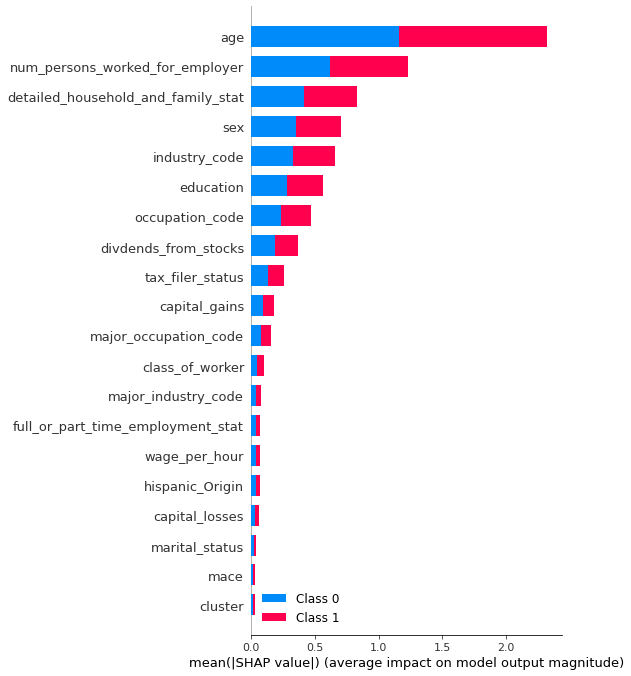

In [63]:
explain = shap.TreeExplainer(lgb)
shap_values = explain.shap_values(X_test)
shap.summary_plot(shap_values=shap_values,
                  features=X_test, 
                  plot_type='bar')

We see that the most important features by SHAP include:

- Age
- occupation
- sex
- education

This can be explained without calculations, based on the reasoning that men earn more than women, that a middle-aged person earns the most money, that the better education, the more a person earns. Therefore, the graph above is quite consistent with reality.

Now we use **lime** to analyze the predictions.

At the beginning, we will choose a person with an income above 50,000\$ (target=1 => y_test=1)

In [64]:
y_test[y_test == 1]

27       1
33       1
34       1
53       1
109      1
        ..
99717    1
99722    1
99742    1
99753    1
99760    1
Name: target, Length: 6186, dtype: int64

In [65]:
lime = LimeTabularExplainer(training_data=X_test.values, 
                            mode='regression', 
                            feature_names=X_test.columns)

In [67]:
explainer = lime.explain_instance(X_test.iloc[27], lgb.predict, num_features=30)
explainer.show_in_notebook(show_table=True)

We see that such features as gender, education, age make a big contribution to the prediction

Also consider the built-in method **feature_importances_** in **LightGBM**

In [68]:
feature_importances = pd.DataFrame(lgb.feature_importances_, 
                                   index=X_test.columns,
                                   columns=["importance"])

feature_importances.sort_values(by=['importance'], ascending=False)[:15]

importance
capital_gains                              145
age                                        139
occupation_code                            134
divdends_from_stocks                       125
capital_losses                             119
education                                  109
industry_code                              101
num_persons_worked_for_employer             78
wage_per_hour                               65
sex                                         57
class_of_worker                             55
major_industry_code                         54
tax_filer_status                            43
major_occupation_code                       42
detailed_household_and_family_stat          21

We see that logically explainable features that most affect the prediction are in each of the three methods, such as sex, education, age, occupation

### 4.3. Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

In this assignment first we explored the data, made the necessary data transformations, feature engineering, also discarded several features with the help of PCA, added K-means clustering.

To solve this problem, we used the following models:
- LogisticRegression
- XGBClassifier
- LGBMClassifier
- Gradient Boosting Classifier
- DecisionTreeClassifier
- RandomForestClassifier
- Linear Support Vector Classification

We used exhaustive search over specified parameter values for an models above (GridSearchCV) to find the best hyperparameters for each of the models.

We also made a **blended model** based on the “best” models above.

We have applied several **techniques to deal with an imbalanced data**, such as:
- SMOTE (Synthetic Minority Over-sampling Technique)
- BorderlineSMOTE (Over-sampling using Borderline SMOTE)
- RandomOverSampler (Class to perform random over-sampling)
- SMOTETomek (Over-sampling using SMOTE and cleaning using Tomek links)
- ADASYN (Oversample using Adaptive Synthetic (ADASYN) algorithm)

Synthetic Minority Over-sampling Technique **SMOTE** showes the best performance. But other techniques also increase the quality of predictions.

The following basic models **XGBClassifier** and **LGBMClassifier** perform best, but the **Blended model** has the best results (according to **f1 score**) and it's due to the fact that it uses different statistical properties from all basic models. Tuning of hyperparameters takes a very long time, perhaps if spend a couple more days, we can improve some of the models, and this will improve the overall result for blended model. 

We trained all models using train dataset, and the results of the metrics were calculated using the test dataset, we got good results on the test dataset, which means that we could trust our models.

Thank you for your time, have a great day. 

Sincerely, Nepochatov Alexey, HSE, MDS Fall2021